#### In this project, I will practice binary classification on Titanic Spaceship Dataset. 
#### The goal of the project is to predict whether a person will be transformed to an altenate dimension or not.

##### 1. Basic understanding of Data
##### 2. EDA (Explanatory Data Analysis)
##### 3. Data preprocessing
##### 4. Model Building
##### 5. Model performance check
##### 6. Model Hyper parameter tunning
##### 7. Predicting test data using the best model

In [2]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(style='darkgrid', font_scale=1.5)
pd.set_option('display.max.rows', None)
pd.set_option('display.max.columns', None)

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

from imblearn.over_sampling import SMOTE


In [3]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [4]:
df_train.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True


In [5]:
df_test.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers


EDA and data overview will take place below.

##### Basic understanding of data

In [6]:
# checking dimensions of data
print(df_train.shape)
print(df_test.shape)

(8693, 14)
(4277, 13)


##### Observation
💡 We can observe that in our testing dataset we don't have Transported feature but in training data we have that feature.

💡 So, we have to build model using training data and have to do prediction for our testing data.

In [7]:
# checking duplicates data
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())

0
0


##### Observation
💡 We can observe that we don't have any duplicates values in our both training & testing datasets.

💡 So we dont have any type of Data Lekage in our DataSet.

In [8]:
# checking data types of training and testing data
print(df_train.dtypes)
print(df_test.dtypes)

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object


##### Observation
💡 We can observe that CryoSleep & VIP features contains boolean values but their data type is object so we have to convert their data-type to bool.

💡 We will convert their Data-Types when we will do Data-Preprocessing.

In [9]:
# checking total number and percentage of missing values in training data
print(df_train.isnull().sum())
print('----------------')
print(round(100 * df_train.isnull().sum() / len(df_train), 2))

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64
----------------
PassengerId     0.00
HomePlanet      2.31
CryoSleep       2.50
Cabin           2.29
Destination     2.09
Age             2.06
VIP             2.34
RoomService     2.08
FoodCourt       2.11
ShoppingMall    2.39
Spa             2.11
VRDeck          2.16
Name            2.30
Transported     0.00
dtype: float64


In [10]:
# checking total number and percentage of missing values in testing data
print(df_test.isnull().sum())
print('----------------')
print(round(100 * df_test.isnull().sum() / len(df_test), 2))

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64
----------------
PassengerId     0.00
HomePlanet      2.03
CryoSleep       2.17
Cabin           2.34
Destination     2.15
Age             2.13
VIP             2.17
RoomService     1.92
FoodCourt       2.48
ShoppingMall    2.29
Spa             2.36
VRDeck          1.87
Name            2.20
dtype: float64


##### Observation
💡 We can observe that there is very less % of missing values in both training & testing data.

💡 So instead of dropping those missing values we will fill/replace those missing values with best suitable values according to the data.

In [11]:
# checking cardinality of categorical features
# cardinality = the rating of duplicate of values in array
# less duplicates = it means 'High' cardinality and vice versa
# cardinality tells specific culumn's number of duplicates to the whole rows.

print(df_train.select_dtypes(include='object').nunique())

print(df_test.select_dtypes(include='object').nunique())

PassengerId    8693
HomePlanet        3
CryoSleep         2
Cabin          6560
Destination       3
VIP               2
Name           8473
dtype: int64
PassengerId    4277
HomePlanet        3
CryoSleep         2
Cabin          3265
Destination       3
VIP               2
Name           4176
dtype: int64


##### Observation
💡 We can observe that PassengerId, Cabin & Name feature of both datasets are having high cardinality

💡 We normally drop the features having high cardinality but in this project we will do Feature Engineering and will create new features from this features.

💡 Because more amount of data leads to better predictions by model.

##### EDA

Text(0.5, 1.0, 'Transported Feature Distribution')

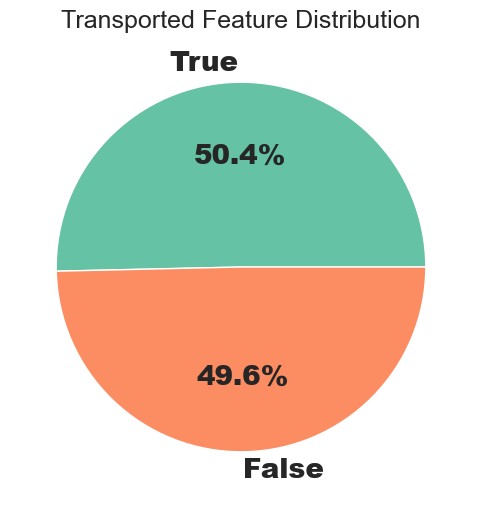

In [12]:
# visualizing targe feature 'Transpoted'
plt.figure(figsize=(10, 6))
plt.pie(df_train['Transported'].value_counts(), 
        labels=df_train['Transported'].value_counts().keys(),
        autopct='%1.1f%%',
        textprops={'fontsize':20, 'fontweight':'black'}, 
        colors=sns.color_palette('Set2'))
plt.title('Transported Feature Distribution')

##### Observation
💡 We can observe that our Transported Feature is highly balanced.

💡 So we don't have to use techniques like under_sampling or over_sampling

Text(0.5, 1.0, 'Age Feature Distribution')

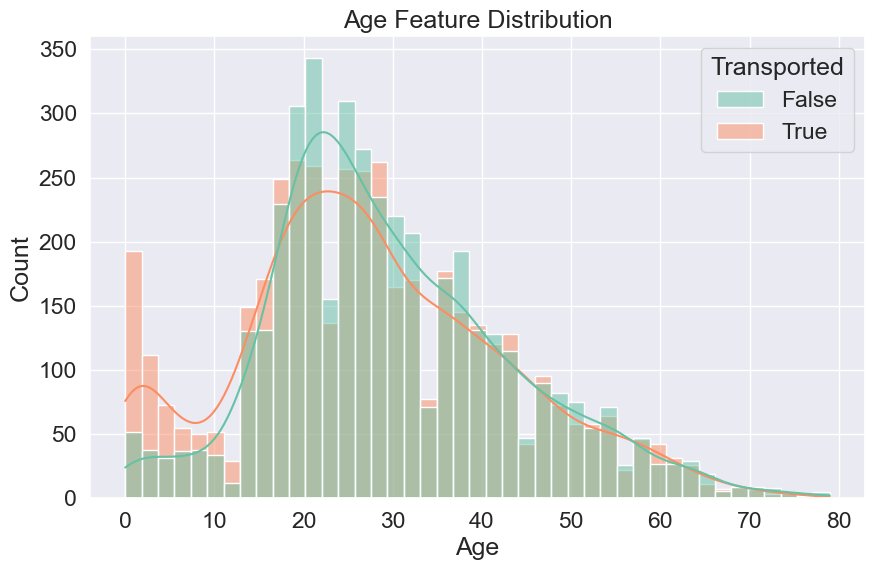

In [13]:
# Visualizing Age feature
plt.figure(figsize=(10, 6))
sns.histplot(x = df_train['Age'], hue='Transported', 
             data=df_train, kde=True, palette='Set2')
plt.title('Age Feature Distribution')

##### Observation
💡 Most of the passengers were between age 18-32.

💡 Age from 0-18 passengers are highly transported when compared with not transported passengers espically for those who were new born.

💡 Age from 18-32 passengers are comparatively less transported when compared to not transported passengers.

💡 Age above 32 seems to be equally transported when compared to not transported passengers.

##### Insights

💡 We can create a new feature Age-Catgeory from age in which we can split ages into different categories.

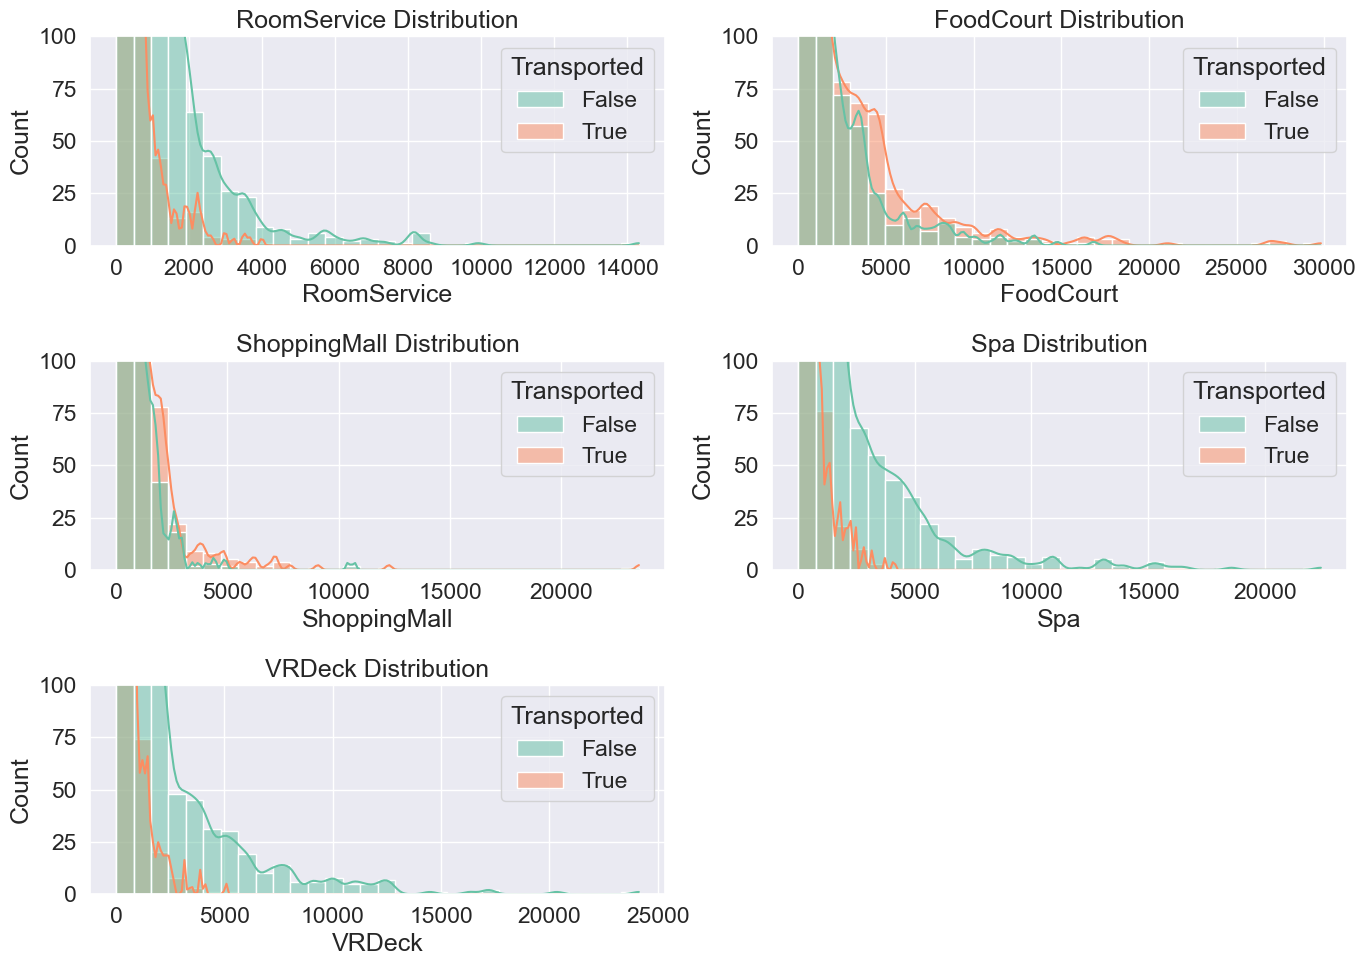

In [14]:
# visualizing All expenditure features ('RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck')
exp_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

plt.figure(figsize=(14, 10))
for idx, column in enumerate(exp_cols):
    plt.subplot(3, 2, idx+1)
    sns.histplot(x=column, hue='Transported', data=df_train, bins=30, kde=True, palette='Set2')
    plt.title(f'{column} Distribution')
    plt.ylim(0, 100)
    plt.tight_layout()

##### Observation

💡 We can observe that most of the passengers doesn't seems to expend any money.

💡 Since most of the expenses are 0 so the values with higher expenses are 
kind of outliers in our data.

💡 We can observe that RoomService,Spa & VRDeck seems to have similar distributions.

💡 We can also observe that FoodCourt & ShoppingMall are having kind of similar distributions.

💡 All the expenditure features distribution is Right-Skewed.

💡 Passengers having less expenses are more likely to be transported than passengers having high expenses.

##### Insights

💡 Since, all expenditure features are having right-skewed distribution. So before Model Building we will transform these features to normal distribution using log-transformation

💡 We can create a new feature Total Expenditure indicating the total expenses of all different expenditures done by the passengers.

💡 Since, most people expense is 0 so we can create a new boolean feature No Spending indicating whether the passenger total expense is 0 or not.

💡 We can split Total Expenditure into different categories of expenditure like Low , Medium & High Expenses and create one more new feature Expenditure Category

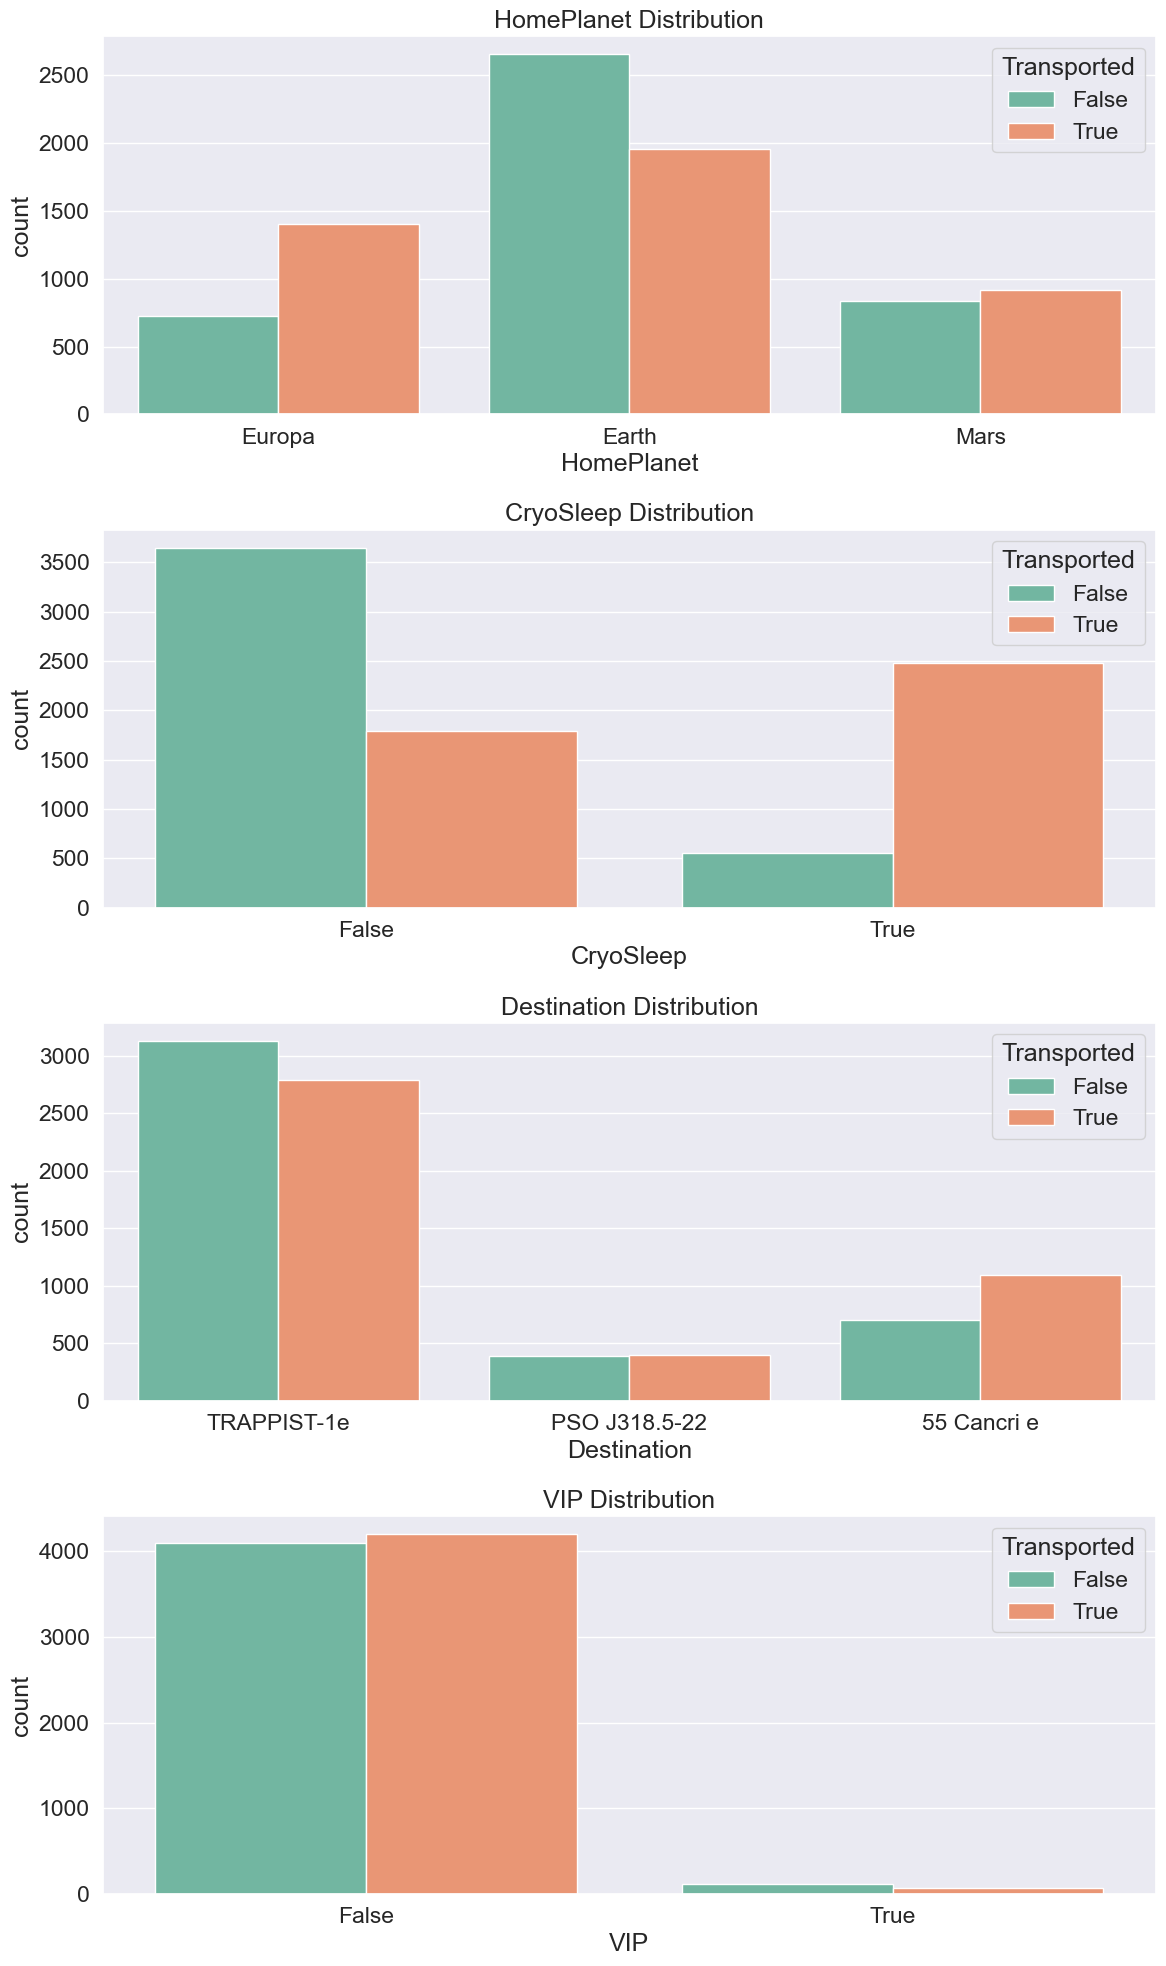

In [15]:
# visualizing Categorical features ('HomePlanet', 'CryoSleep', 'Destination', 'VIP')
cat_cols = ["HomePlanet","CryoSleep","Destination","VIP"]

plt.figure(figsize=(12,20))
for idx,column in enumerate(cat_cols):
    plt.subplot(4,1,idx+1)
    sns.countplot(x=column, hue="Transported", data=df_train, palette="Set2")
    plt.title(f"{column} Distribution")
    plt.tight_layout()

##### Observation

💡 In HomePlanet feature we can observe that most of passenger are from Earth but passenger from Earth are Comparatively Less Transported, passenger from Mars are Equally Transported, and passengers from Europa are Highly Transported.

💡 In Destination feature we can observe that most of the passengers are transported to Trappist-1e.

💡 In VIP feature we can observe that one cateogry is dominating other category too much. So it doesn't seem to be usefull feature because it can lead to overfitting in our model.

💡 So it's better to drop VIP feature before Model building.

##### NOTE

💡 We have visualized all the features expect PassengerId, Name, Cabin features. We can't visualize this features because they are having high cardinality.

💡 We will visualize this feature after creating new features from this old features.

##### Feature Engineering

In [16]:
# creating new features from 'PassengerId'
df_train['PassengerId'].head().to_frame()

,PassengerId
0,0001_01
1,0002_01
2,0003_01
3,0003_02
4,0004_01


##### How will we do feature engineering on PassengerId

💡 We know that each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number of people within the group.

💡 So we can create a new feature Group_Size which will indicate total number of members present in each group.

💡 We can create one more new feature Travelling Solo indicating whether the passenger is travelling solo or in a group.

In [17]:
def passengerid_new_features(df):
    
    #Splitting Group and Member values from "PassengerId" column.
    df["Group"] = df["PassengerId"].apply(lambda x: x.split("_")[0])
    df["Member"] =df["PassengerId"].apply(lambda x: x.split("_")[1])
    
    #Grouping the "Group" feature with respect to "member" feature to check which group is travelling with how many members
    x = df.groupby("Group")["Member"].count().sort_values()
    
    #Creating a set of group values which are travelling with more than 1 members.
    y = set(x[x>1].index)
    
    #Creating a new feature "Solo" which will indicate whether the person is travelling solo or not.
    df["Travelling_Solo"] = df["Group"].apply(lambda x: x not in y)
    
    #Creating a new feature "Group_size" which will indicate each group number of members.
    df["Group_Size"]=0
    for i in x.items():
        df.loc[df["Group"]==i[0],"Group_Size"]=i[1]

In [18]:
passengerid_new_features(df_train)
passengerid_new_features(df_test)

In [19]:
# We don't require Group & Member features any more so we will drop those feature from both datasets

df_train.drop(columns=["Group","Member"], inplace=True)
df_test.drop(columns=["Group","Member"], inplace=True)

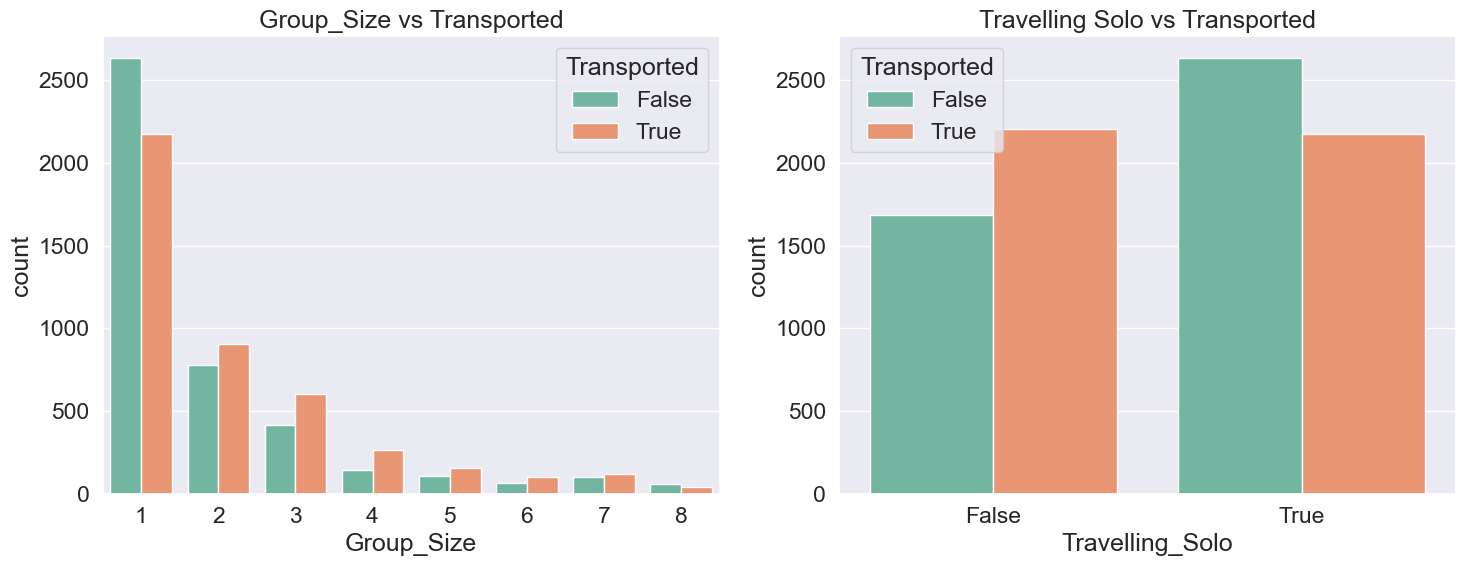

In [20]:
# Visualizing "Group_Size" & "Travelling_Solo" Features.
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(x="Group_Size", hue="Transported", data=df_train,palette="Set2")
plt.title("Group_Size vs Transported")

plt.subplot(1,2,2)
sns.countplot(x="Travelling_Solo", hue="Transported", data=df_train,palette="Set2")
plt.title("Travelling Solo vs Transported")
plt.tight_layout()
plt.show()

##### Observation

💡 From Group_Size feature we can observe that most the passengers are travelling alone.

💡 From Travelling_Solo feature we can observe that passengers travelling solo are comparatively less transported when compared with passenger travelling in group.

In [21]:
# Creating New Feature using "Cabin" Feature¶
df_train["Cabin"].head().to_frame()

,Cabin
0,B/0/P
1,F/0/S
2,A/0/S
3,A/0/S
4,F/1/S


##### How will we do feature engineering on Cabin

💡 We know that cabin feature consists of deck/num//side , where deck is deck location, num is deck_number and side can be P for port or S for Starboard.

💡 We can separate all these 3 values from cabin & create three new features Cabin_Deck, Cabin_Number & Cabin_Side.

💡 We also know that Cabin feature is having NaN values so to avoid error while splitting we have to replace it in such a way taht we can split those NaN Values in all three new features respectively.

In [22]:
def cabin_new_feature(df):
    df["Cabin"].fillna("np.nan/np.nan/np.nan",inplace=True)  #In this way we can split NaN values into all three categories
    
    df["Cabin_Deck"] = df["Cabin"].apply(lambda x: x.split("/")[0])
    df["Cabin_Number"]  = df["Cabin"].apply(lambda x: x.split("/")[1])
    df["Cabin_Side"] = df["Cabin"].apply(lambda x: x.split("/")[2])
    
    #Replacing string nan values to numpy nan values..
    cols = ["Cabin_Deck","Cabin_Number","Cabin_Side"]
    df[cols]=df[cols].replace("np.nan",np.nan)
    
    #Filling Missing Values in new features created.
    df["Cabin_Deck"].fillna(df["Cabin_Deck"].mode()[0],inplace=True)
    df["Cabin_Side"].fillna(df["Cabin_Side"].mode()[0],inplace=True)
    df["Cabin_Number"].fillna(df["Cabin_Number"].median(),inplace=True)

In [23]:
cabin_new_feature(df_train)
cabin_new_feature(df_test)

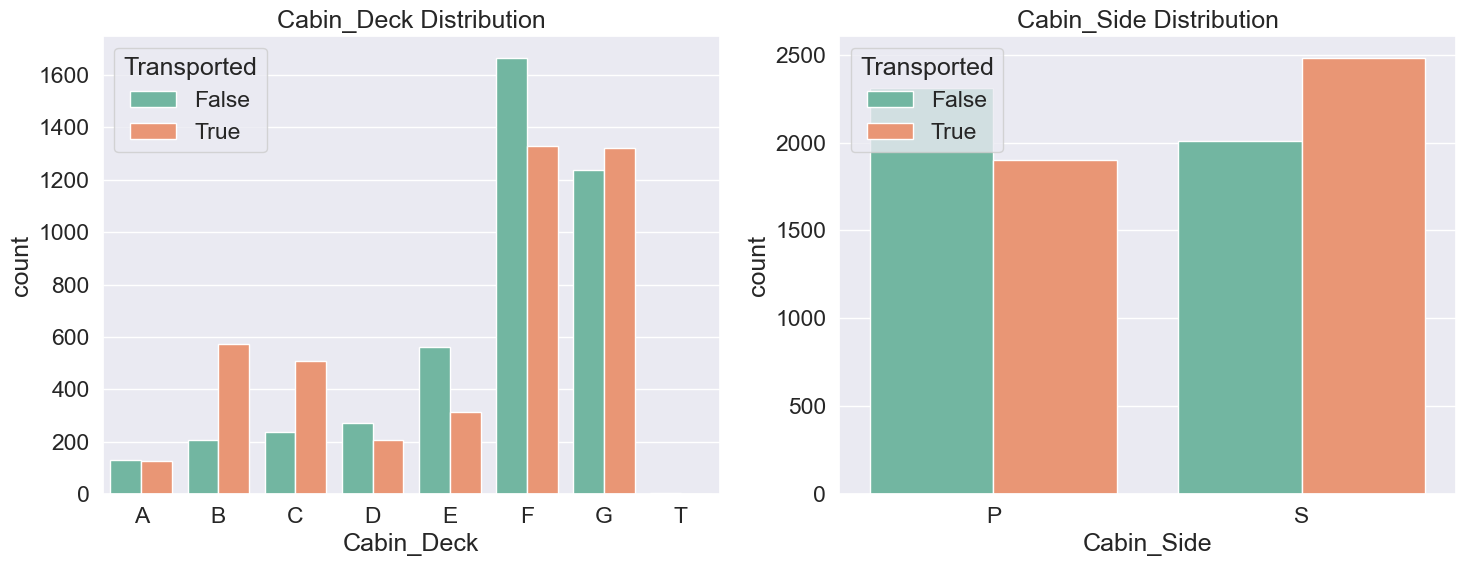

In [24]:
# Visualizing "Cabin_Deck" & "Cabin_Side" Feature
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(x="Cabin_Deck",hue="Transported", data=df_train, palette="Set2",order=["A","B","C","D","E","F","G","T"])
plt.title("Cabin_Deck Distribution")

plt.subplot(1,2,2)
sns.countplot(x="Cabin_Side", hue="Transported", data=df_train, palette="Set2")
plt.title("Cabin_Side Distribution")
plt.tight_layout()
plt.show()

##### Insights

💡 From Cabin_Deck we can observe that most of the people are from F & G Deck.

💡 There are very few passengers in Cabin_Deck ,T.

💡 Passengers from Cabin Deck B & C are very highly transported.

💡 From Cabin_Side we can observe that almost half passengers were from cabin side S and half from cabin side P.

💡 But passenger from cabin_side S are Highly Transported but passengers from cabin_side P are Equally Transported

In [25]:
# Visualizing "Cabin_Number" Feature.
df_train["Cabin_Number"]=df_train["Cabin_Number"].astype(int)
df_test["Cabin_Number"]=df_test["Cabin_Number"].astype(int)

In [26]:
# Before visualizing let's do some statistical anlysis on Cabin_Number feature
print("Total Unique values present in Cabin_Number feature is:",df_train["Cabin_Number"].nunique())
print("The Mean of Cabin_Number Feature is: ",df_train["Cabin_Number"].mean())
print("The Median of Cabin_Number Feature is:",df_train["Cabin_Number"].median())
print("The Minimum value of Cabin_Number feature is:",df_train["Cabin_Number"].min())
print("The Maximum value of Cabin_number Feature is:",df_train["Cabin_Number"].max())

Total Unique values present in Cabin_Number feature is: 1817
The Mean of Cabin_Number Feature is:  596.3989416772115
The Median of Cabin_Number Feature is: 427.0
The Minimum value of Cabin_Number feature is: 0
The Maximum value of Cabin_number Feature is: 1894


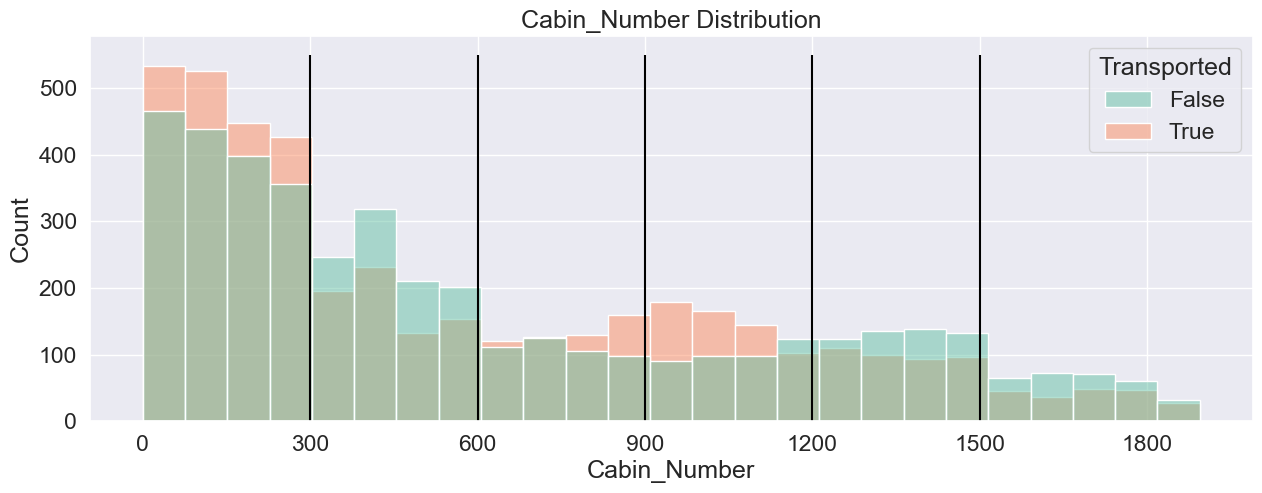

In [27]:
plt.figure(figsize=(15,5))
sns.histplot(x="Cabin_Number",data=df_train,hue="Transported",palette="Set2")
plt.title("Cabin_Number Distribution")
plt.xticks(list(range(0,1900,300)))
plt.vlines(300,ymin=0,ymax=550,color="black")
plt.vlines(600,ymin=0,ymax=550,color="black")
plt.vlines(900,ymin=0,ymax=550,color="black")
plt.vlines(1200,ymin=0,ymax=550,color="black")
plt.vlines(1500,ymin=0,ymax=550,color="black")
plt.show()

##### Insights

💡 We can observe that Cabin_Number can be divided into different regions with group of 300 passenegrs.

💡 So we can create a new features Cabin_Regions which will indicate passenger cabin number region.

In [28]:
# Creating New Feature "Cabin_Regions" From "Cabin_Number".
def cabin_regions(df):
    df["Cabin_Region1"] = (df["Cabin_Number"]<300)
    df["Cabin_Region2"] = (df["Cabin_Number"]>=300) & (df["Cabin_Number"]<600)
    df["Cabin_Region3"] = (df["Cabin_Number"]>=600) & (df["Cabin_Number"]<900)
    df["Cabin_Region4"] = (df["Cabin_Number"]>=900) & (df["Cabin_Number"]<1200)
    df["Cabin_Region5"] = (df["Cabin_Number"]>=1200) & (df["Cabin_Number"]<1500)
    df["Cabin_Region6"] = (df["Cabin_Number"]>=1500)

In [29]:
cabin_regions(df_train)
cabin_regions(df_test)

In [30]:
# We don't need Cabin_Number Feature anymore so we will drop this feature

df_train.drop(columns=["Cabin_Number"],inplace=True)
df_test.drop(columns=["Cabin_Number"],inplace=True)

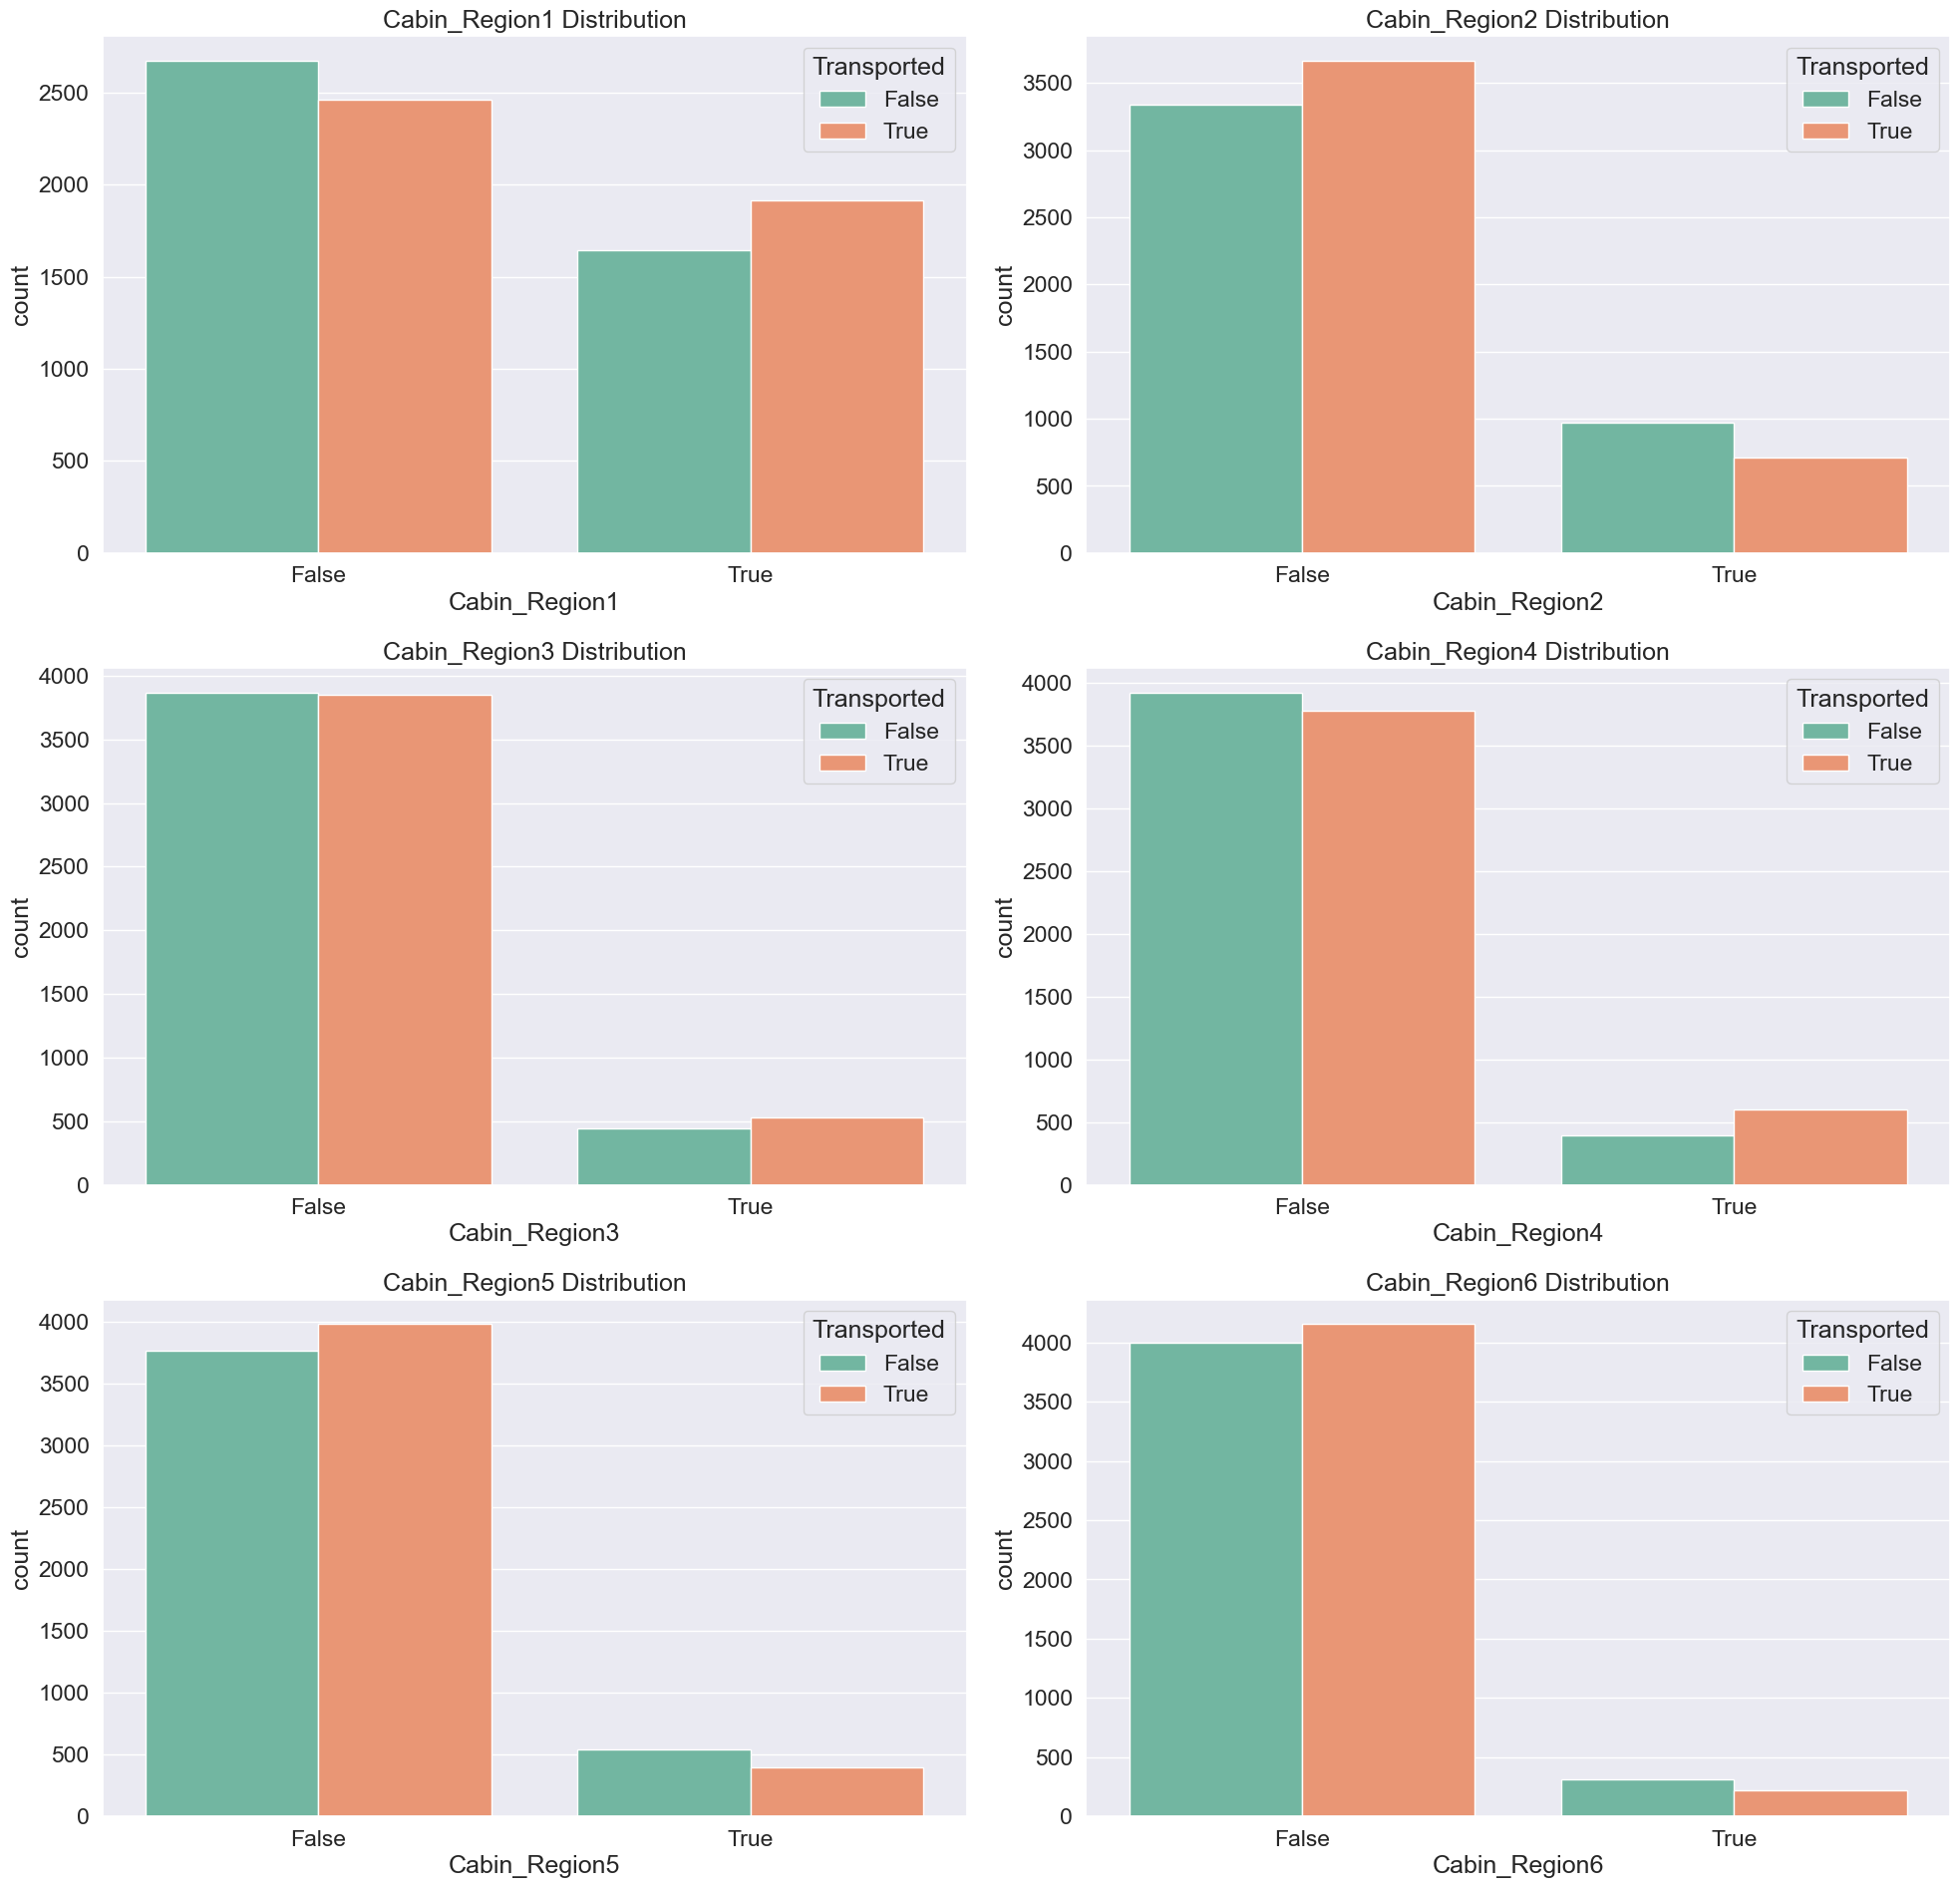

In [31]:
# Visualizing "Cabin_Region" Feature.
cols = ["Cabin_Region1","Cabin_Region2","Cabin_Region3","Cabin_Region4","Cabin_Region5","Cabin_Region6"]

plt.figure(figsize=(20,25))
for idx,value in enumerate(cols):
    plt.subplot(4,2,idx+1)
    sns.countplot(x=value, hue="Transported", data=df_train, palette="Set2")
    plt.title(f"{value} Distribution")
    plt.tight_layout()

##### Observation

💡 We can observe that passengers from Cabin_Region1 are Highly Transported when compared with other cabin regions.

💡 we can also observe that as the cabin region number is increasing passengers transport is decreasing.

In [32]:
# creating New Feature From "Age"
df_train["Age"].head().to_frame()

,Age
0,39.0
1,24.0
2,58.0
3,33.0
4,16.0


##### How we will do feature engineering on Age Feature

💡 As we have done EDA on Age feature we collected some insights over there that the ages can be splitted into different groups based on Transported.

💡 So we will create a new feature name Age Group and will split the Age into different groups on the basics of insights we gainedfrom EDA.

In [33]:
def age_group(df):
    age_group  = []
    for i in df["Age"]:
        if i<=12:
            age_group.append("Age_0-12")
        elif (i>12 and i<=18):
            age_group.append("Age_0-18")
        elif (i>18 and i<=25):
            age_group.append("Age_19-25")
        elif (i>25 and i<=32):
            age_group.append("Age_26-32")
        elif (i>32 and i<=50):
            age_group.append("Age_33_50")
        elif (i>50):
            age_group.append("age_50+")
        else:
            age_group.append(np.nan)
        
    df["Age Group"] = age_group

In [34]:
age_group(df_train)
age_group(df_test)

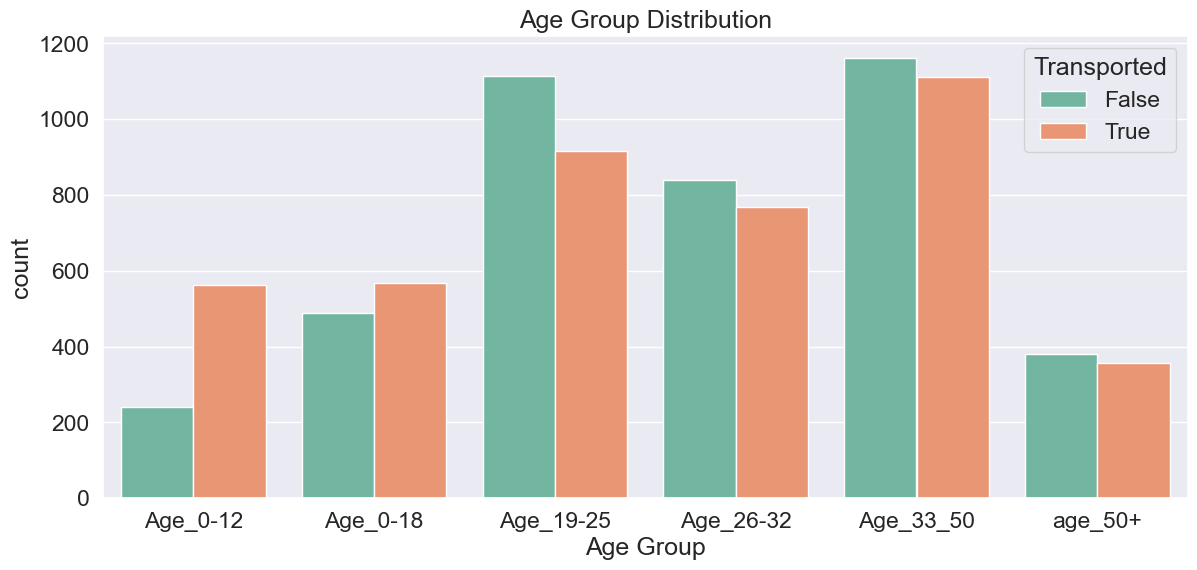

In [35]:
# Visualizing "Age Group" Feature.
order = sorted(df_train["Age Group"].value_counts().keys().to_list())

plt.figure(figsize=(14,6))
sns.countplot(x="Age Group",hue="Transported", data=df_train, palette="Set2",order=order)
plt.title("Age Group Distribution");

##### Insights

💡 This new feature looks more relevent to our target data.

💡 Age_0-12 & Age_0-18 are more likely to be transported compared to not transported.

💡 Age_19-25 , Age_26_32 & Age_33_50 are less likely to be transported compared to not transported.

💡 Age_50+ are almost equally transported compared to not transported.

In [36]:
# Creating New Features Using All Expenditude Features.
df_train[["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]].head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,0.0,0.0,0.0,0.0
1,109.0,9.0,25.0,549.0,44.0
2,43.0,3576.0,0.0,6715.0,49.0
3,0.0,1283.0,371.0,3329.0,193.0
4,303.0,70.0,151.0,565.0,2.0


##### How can we do feature engineering on all expenditure featrues

💡 When we have done EDA on this expenditure features we gained some insights as:-

1. We can create a Total Expenditure Feature by combining all the expenditures.

2. We can create a No Spending boolean feature from Total Expenditure feature indicating True for those passengers who have spent 0 expense.

3. We can split Total Expenditure into different categories indicating whether the person is having no_expense, low_expense, medium_expense or high_expense and can create a new feature Expenditure Category.

In [37]:
exp_cols = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

def new_exp_features(df):
    df["Total Expenditure"] = df[exp_cols].sum(axis=1)
    df["No Spending"] = (df["Total Expenditure"]==0)

In [38]:
new_exp_features(df_train)
new_exp_features(df_test)

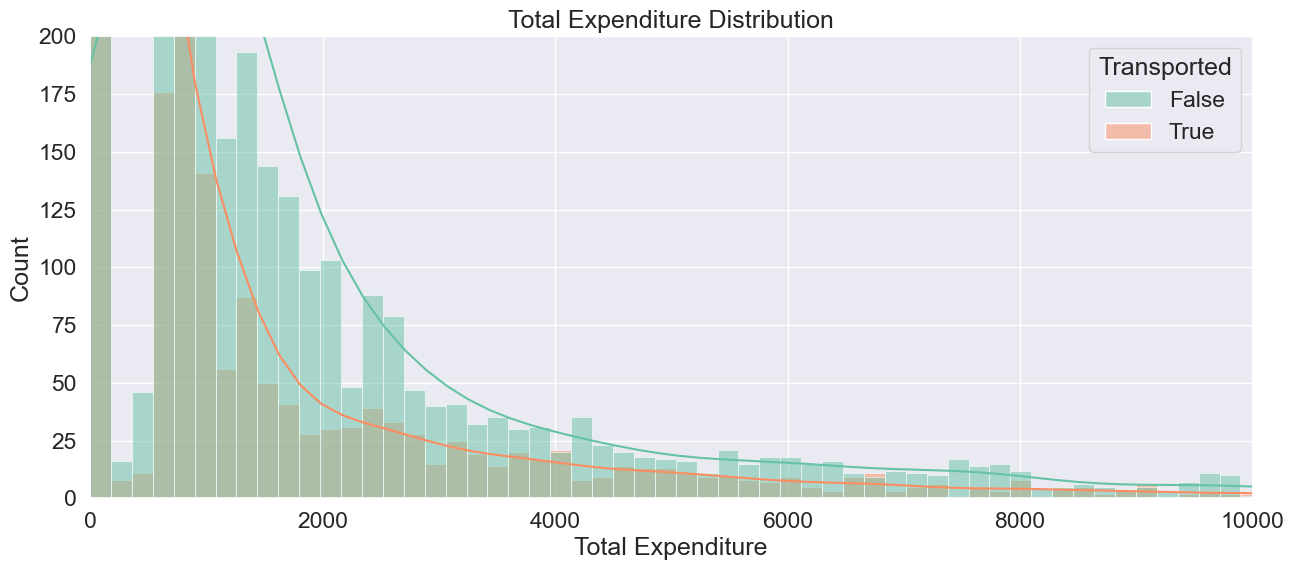

In [39]:
# Visualizing "Total Expenditure" Feature.
plt.figure(figsize=(15,6))
sns.histplot(x="Total Expenditure", hue="Transported", data=df_train, kde=True, palette="Set2",bins=200)
plt.ylim(0,200)
plt.xlim(0,10000)
plt.title("Total Expenditure Distribution");

In [40]:
# Generating some statistical information from Total Expenditue feature

mean = round(df_train["Total Expenditure"].mean())
median = df_train["Total Expenditure"].median()

print("Mean value of Total Expenditure feature is = ",mean)
print("Median value of Total Expenditure feature is = ",median)

Mean value of Total Expenditure feature is =  1441
Median value of Total Expenditure feature is =  716.0


##### Insights

💡 Using above measure of central tendency values we can split Total Expenditure Features into different expense categories.

💡 If Total Expenditure is equal to 0 then No Expense category.

💡 If Total Expenditure is between 1-716 then Low Expense category.

💡 If Total Expenditure is between 717-1441 then Medium Expense category.

💡 If Total Expenditure is greater thean 1441 then High Expense category.

In [41]:
def expenditure_category(df):
    expense_category = []
    
    for i in df["Total Expenditure"]:
        if i==0:
            expense_category.append("No Expense")
        elif (i>0 and i<=716):
            expense_category.append("Low Expense")
        elif (i>716 and i<=1441):
            expense_category.append("Medium Expense")
        elif (i>1441):
            expense_category.append("High Expense")
    
    df["Expenditure Category"] = expense_category

In [42]:
expenditure_category(df_train)
expenditure_category(df_test)

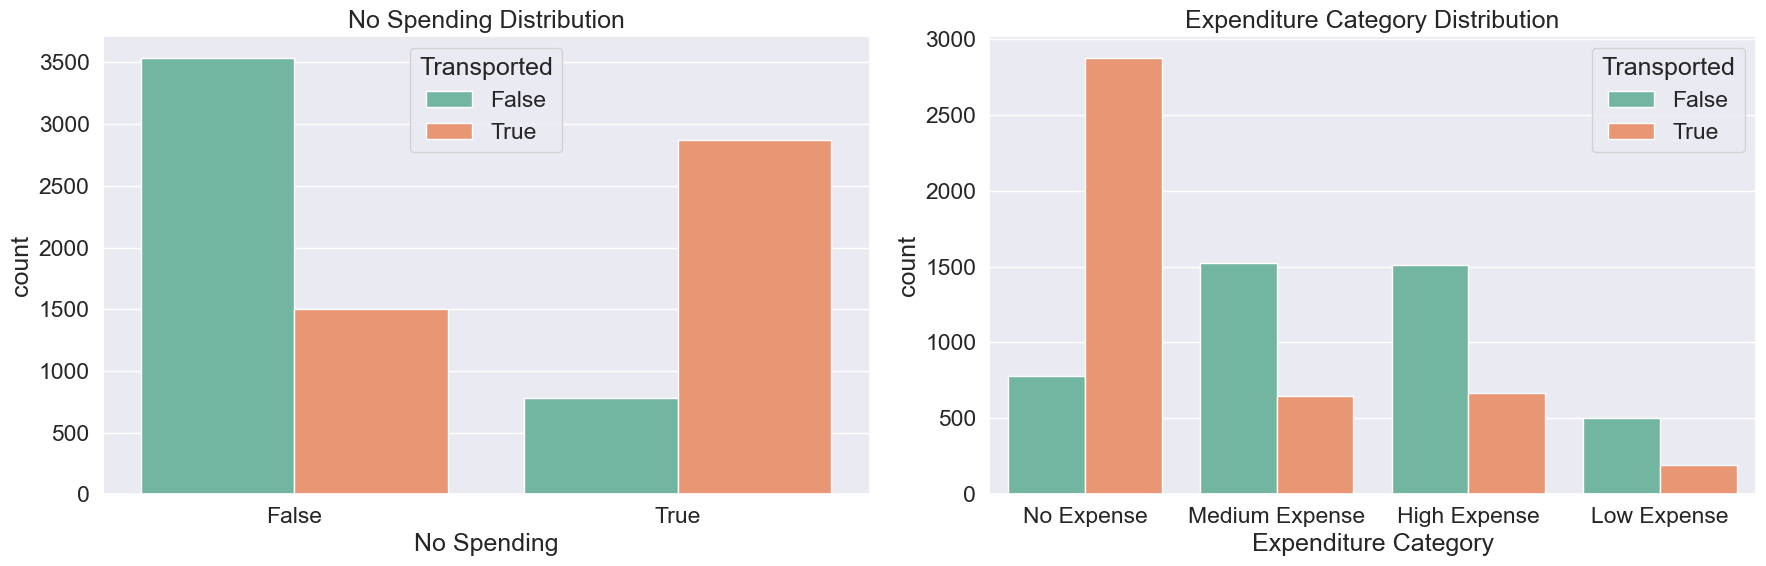

In [43]:
# Visualizing "No Spending" & "Expenditure Category" Features.
cols = ["No Spending", "Expenditure Category"]

plt.figure(figsize=(18,6))
for idx,column in enumerate(cols):
    plt.subplot(1,2,idx+1)
    sns.countplot(x=column, hue="Transported", data=df_train, palette="Set2")
    plt.title(f"{column} Distribution")
    plt.tight_layout()

##### Observation

💡 In Total Expenditure feature we can observe that passengers having low total expenses are likely to be transported more.

💡 In No Spending feature we can observe that passenger having No Spending are highly transported.

💡 in Expenditure Category feature we can confirm than passenger having No Expense are highly transported .

##### Data preprocessing

In [44]:
# Checking missing values
df_train.isnull().sum()

PassengerId               0
HomePlanet              201
CryoSleep               217
Cabin                     0
Destination             182
Age                     179
VIP                     203
RoomService             181
FoodCourt               183
ShoppingMall            208
Spa                     183
VRDeck                  188
Name                    200
Transported               0
Travelling_Solo           0
Group_Size                0
Cabin_Deck                0
Cabin_Side                0
Cabin_Region1             0
Cabin_Region2             0
Cabin_Region3             0
Cabin_Region4             0
Cabin_Region5             0
Cabin_Region6             0
Age Group               179
Total Expenditure         0
No Spending               0
Expenditure Category      0
dtype: int64

In [ ]:
%pip install missingno

In [47]:
# visualizing missing numbers
import missingno as msno

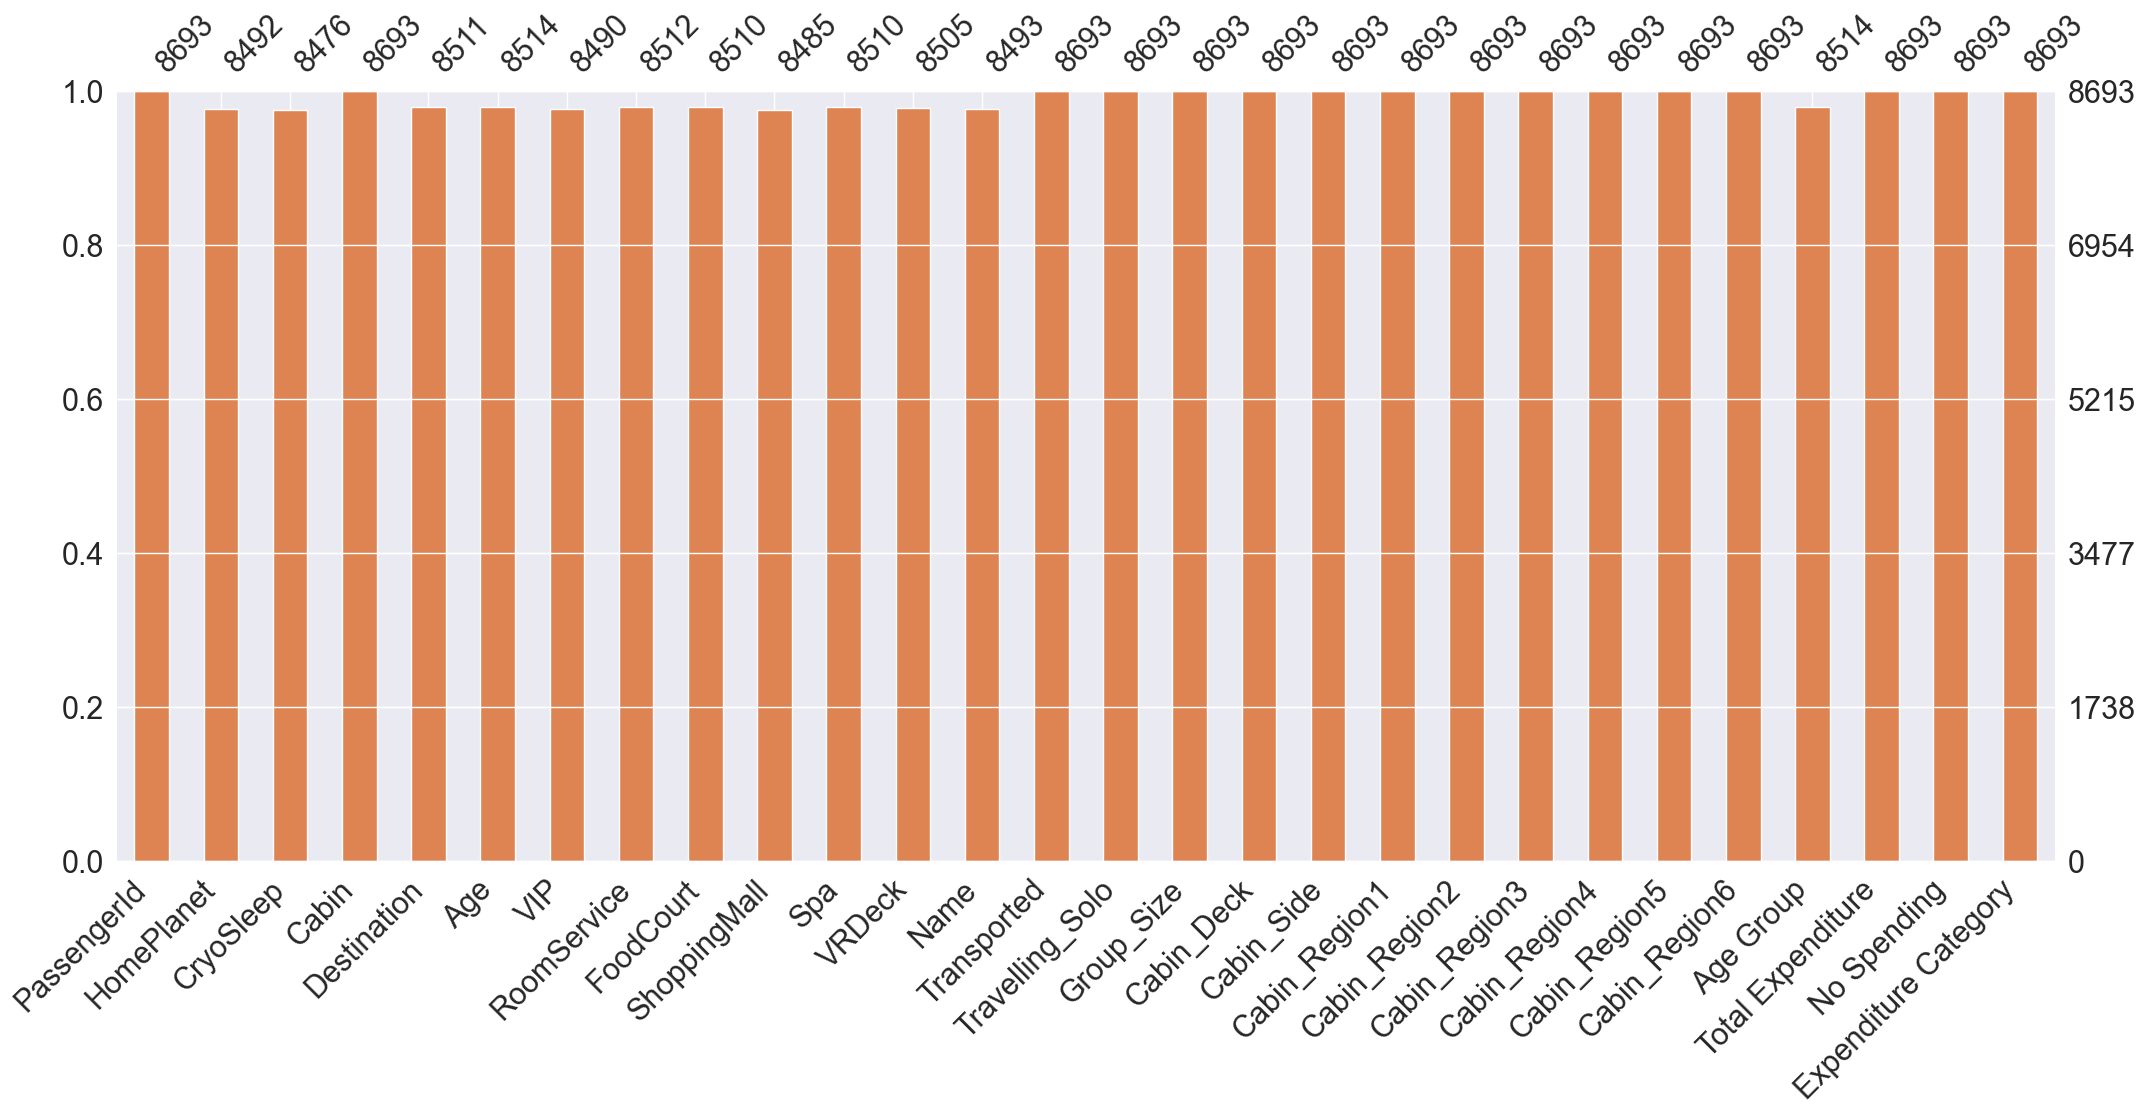

In [48]:
msno.bar(df_train, color='C1', fontsize=22)
plt.show()

In [49]:
# handling missing values
cat_cols = df_train.select_dtypes(include=['object', 'bool']).columns.tolist()
cat_cols.remove('Transported')
num_cols = df_train.select_dtypes(include=['int', 'float']).columns.tolist()

In [51]:
print('Categorical colunms:', cat_cols)
print('\n', '-'*120)
print('Numerical columns:', num_cols)

Categorical colunms: ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name', 'Travelling_Solo', 'Cabin_Deck', 'Cabin_Side', 'Cabin_Region1', 'Cabin_Region2', 'Cabin_Region3', 'Cabin_Region4', 'Cabin_Region5', 'Cabin_Region6', 'Age Group', 'No Spending', 'Expenditure Category']

 ------------------------------------------------------------------------------------------------------------------------
Numerical columns: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Group_Size', 'Total Expenditure']


In [52]:
# using simple imputer to fill missing values
imputer1 = SimpleImputer(strategy='most_frequent') # to fill categorical features
imputer2 = SimpleImputer(strategy='median') # to fill numerical features

In [53]:
def fill_missingno(df):
    df[cat_cols] = imputer1.fit_transform(df[cat_cols])
    df[num_cols] = imputer2.fit_transform(df[num_cols])

In [54]:
fill_missingno(df_train)
fill_missingno(df_test)

In [55]:
print(df_train.isnull().sum())
print(df_test.isnull().sum())

PassengerId             0
HomePlanet              0
CryoSleep               0
Cabin                   0
Destination             0
Age                     0
VIP                     0
RoomService             0
FoodCourt               0
ShoppingMall            0
Spa                     0
VRDeck                  0
Name                    0
Transported             0
Travelling_Solo         0
Group_Size              0
Cabin_Deck              0
Cabin_Side              0
Cabin_Region1           0
Cabin_Region2           0
Cabin_Region3           0
Cabin_Region4           0
Cabin_Region5           0
Cabin_Region6           0
Age Group               0
Total Expenditure       0
No Spending             0
Expenditure Category    0
dtype: int64
PassengerId             0
HomePlanet              0
CryoSleep               0
Cabin                   0
Destination             0
Age                     0
VIP                     0
RoomService             0
FoodCourt               0
ShoppingMall            0

In [56]:
# checking duplicates in data
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())

0
0


In [57]:
# checking cardinality of categorical features
print('cardinality of features in numerical data')
print(df_train.select_dtypes(include=['object']).nunique())
print('\n', '-'*50)
print('\n cardinality of features in categorical data')
print(df_test.select_dtypes(include=['object']).nunique())

cardinality of features in numerical data
PassengerId             8693
HomePlanet                 3
CryoSleep                  2
Cabin                   6561
Destination                3
VIP                        2
Name                    8473
Travelling_Solo            2
Cabin_Deck                 8
Cabin_Side                 2
Cabin_Region1              2
Cabin_Region2              2
Cabin_Region3              2
Cabin_Region4              2
Cabin_Region5              2
Cabin_Region6              2
Age Group                  6
No Spending                2
Expenditure Category       4
dtype: int64

 --------------------------------------------------

 cardinality of features in categorical data
PassengerId             4277
HomePlanet                 3
CryoSleep                  2
Cabin                   3266
Destination                3
VIP                        2
Name                    4176
Travelling_Solo            2
Cabin_Deck                 8
Cabin_Side                 2
Cabin

##### Observation

💡 We have done all feature engineering now we can drop features which have high cardinality.

💡 So we can drop passengerId, Cabin , Name , Group and Surname features.

In [58]:
# dropping categorical features with high cardinality
cols = ['PassengerId', 'Cabin', 'Name']
df_train.drop(columns=cols, inplace=True)
df_test.drop(columns=cols, inplace=True)

In [61]:
# gathering statistical info of numerical features
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,8693.0,28.790291,14.341404,0.0,20.0,27.0,37.0,79.0
RoomService,8693.0,220.009318,660.519050,0.0,0.0,0.0,41.0,14327.0
FoodCourt,8693.0,448.434027,1595.790627,0.0,0.0,0.0,61.0,29813.0
ShoppingMall,8693.0,169.572300,598.007164,0.0,0.0,0.0,22.0,23492.0
Spa,8693.0,304.588865,1125.562559,0.0,0.0,0.0,53.0,22408.0
VRDeck,8693.0,298.261820,1134.126417,0.0,0.0,0.0,40.0,24133.0
Group_Size,8693.0,2.035546,1.596347,1.0,1.0,1.0,3.0,8.0
Total Expenditure,8693.0,1440.866329,2803.045694,0.0,0.0,716.0,1441.0,35987.0


##### Obervation

💡 We can oberve in RoomService, FoodCourt, ShoppingMall, Spa & VRDeck more than 50 percentile of data are equal to 0.

💡 And when we did EDA on this features all of them were having right skewed distribution

💡 So we can simply say there is a presence of large amount of outliers in these features.

💡 So we can tranform these features to normal distribution using Log Transformation.

💡 Since, we are applying log transformation on these expenditure features so we have to apply transformation on Total Expenditure also.

💡 So that the model can have better understanding while finding patterns.

In [62]:
# applying log transformation on expenditure features
cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'Total Expenditure']

for i in cols:
    df_train[i] = np.log(1+df_train[i])
    df_test[i] = np.log(1+df_test[i])

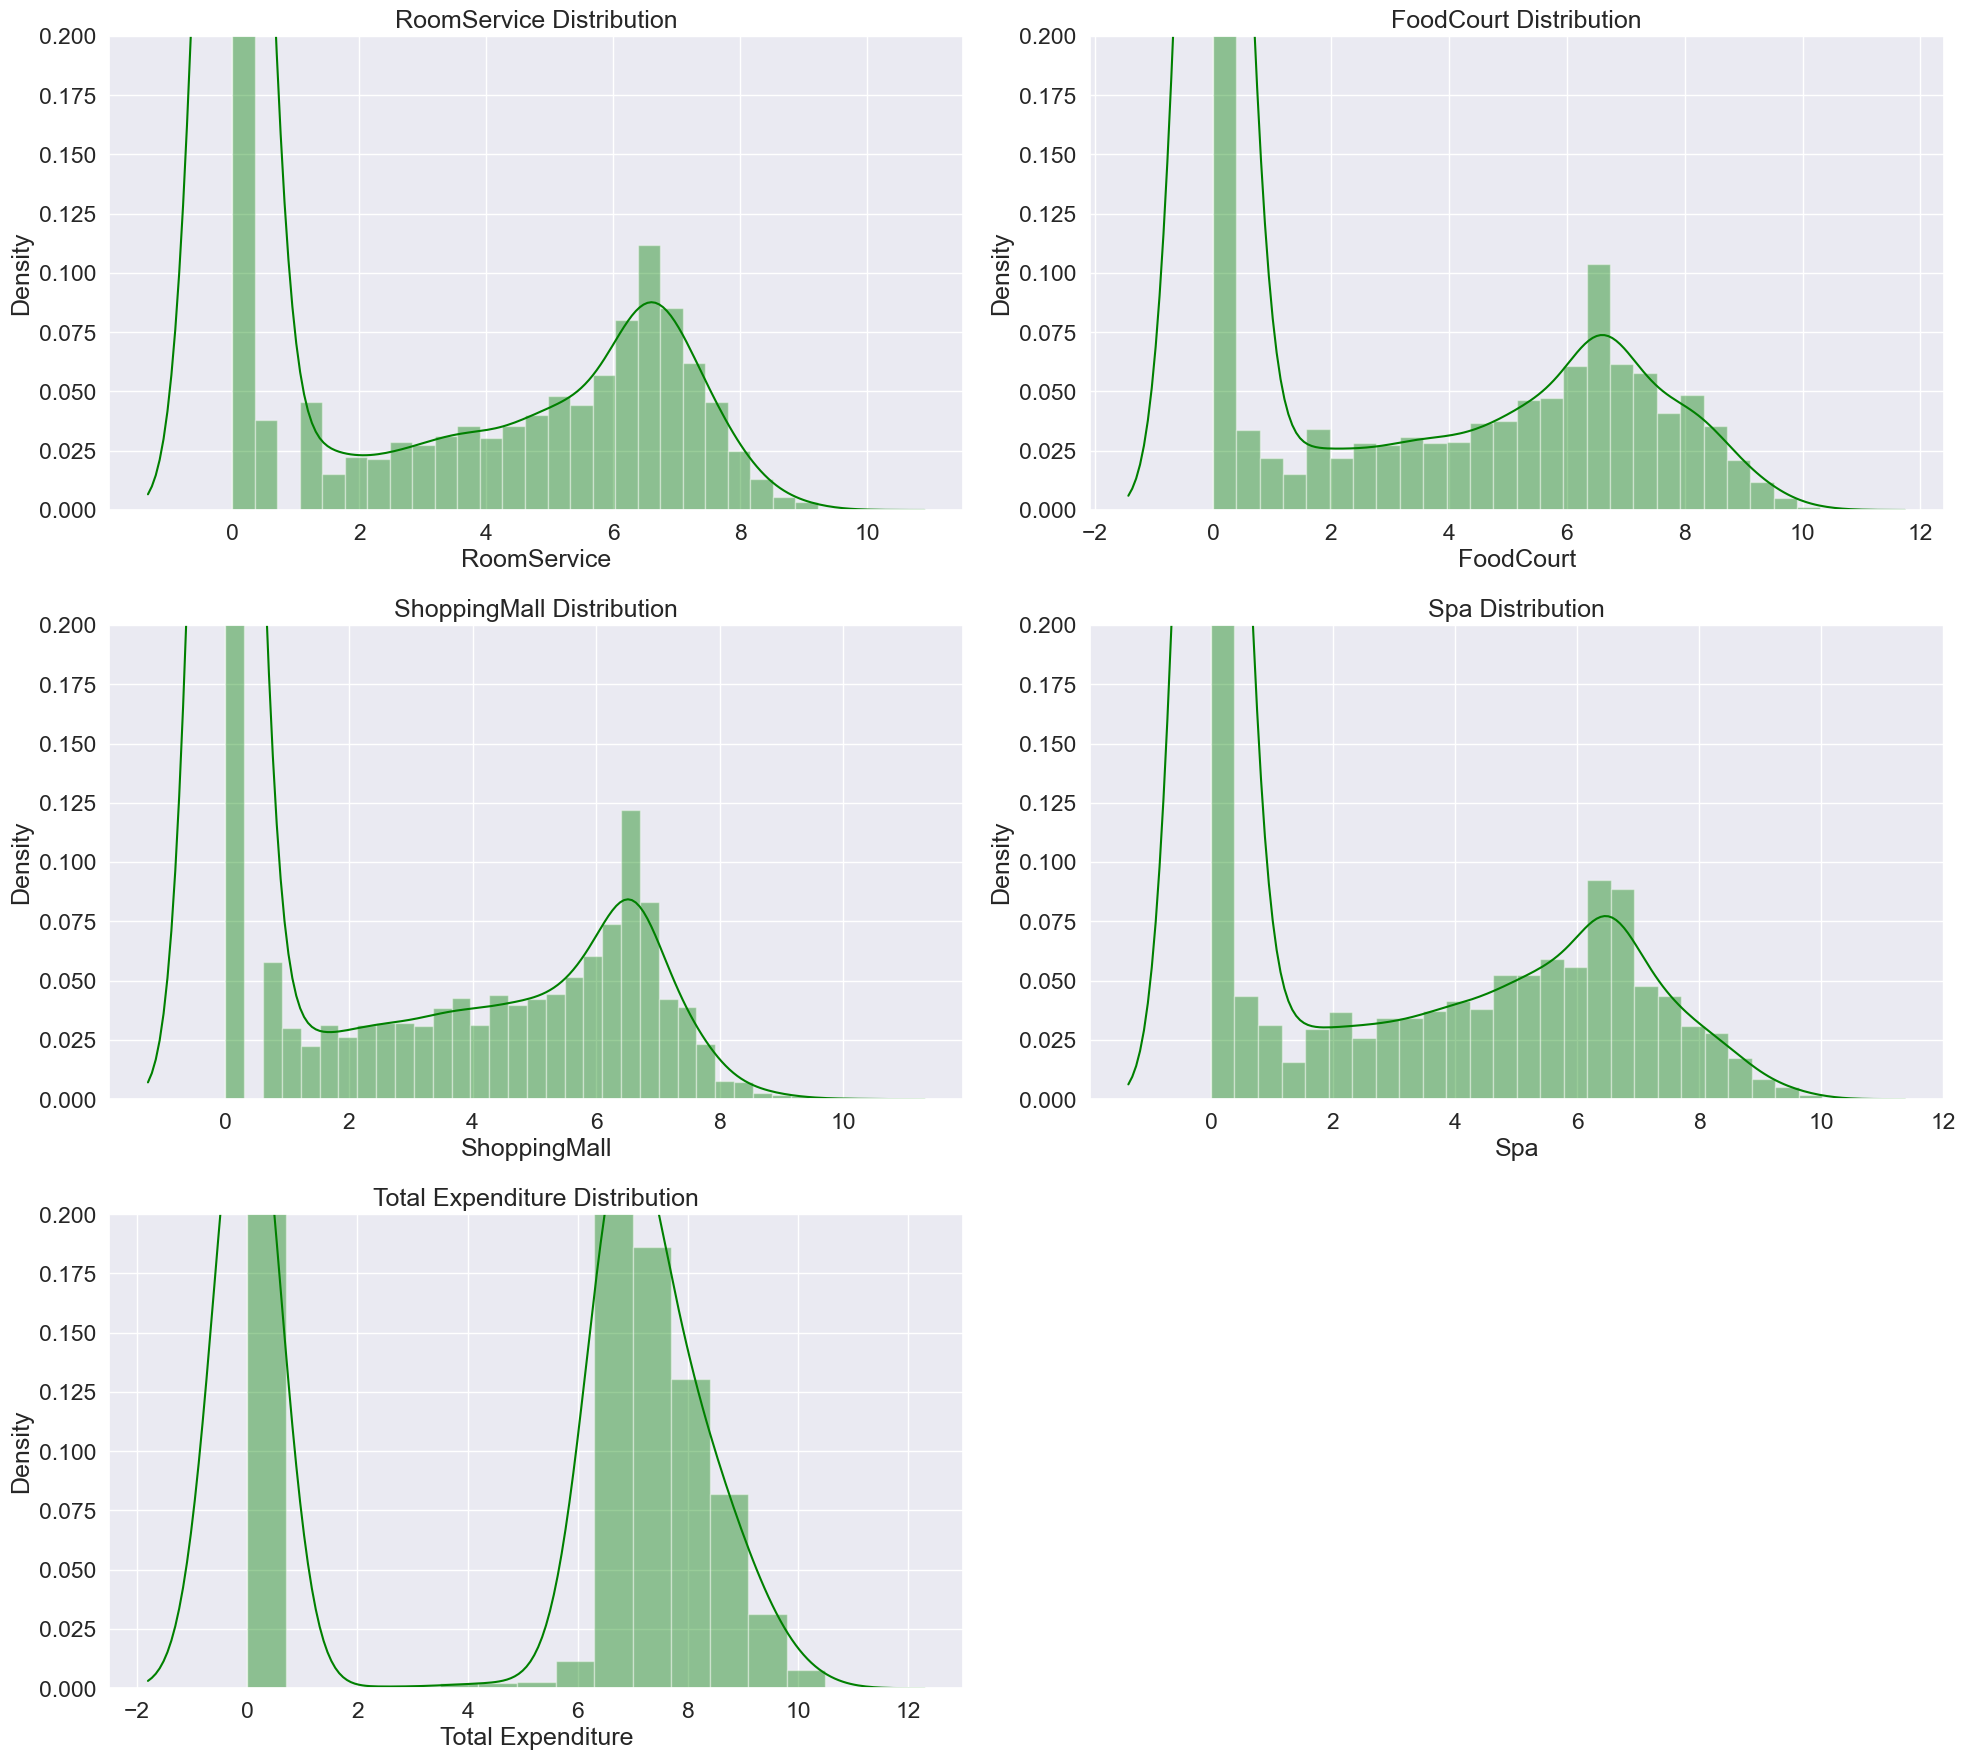

In [66]:
# visualizing these features after transformation
x=1

plt.figure(figsize=(20,35))
for i in cols:
    plt.subplot(6,2,x)
    sns.distplot(df_train[i],color="green")
    plt.ylim(0,0.2)
    plt.title(f"{i} Distribution")
    plt.tight_layout()
    x+=1

In [67]:
# types of features
df_train.dtypes

HomePlanet               object
CryoSleep                object
Destination              object
Age                     float64
VIP                      object
RoomService             float64
FoodCourt               float64
ShoppingMall            float64
Spa                     float64
VRDeck                  float64
Transported                bool
Travelling_Solo          object
Group_Size              float64
Cabin_Deck               object
Cabin_Side               object
Cabin_Region1            object
Cabin_Region2            object
Cabin_Region3            object
Cabin_Region4            object
Cabin_Region5            object
Cabin_Region6            object
Age Group                object
Total Expenditure       float64
No Spending              object
Expenditure Category     object
dtype: object

##### Note

💡 CryoSleep , VIP, Travelling_Solo, No Spending, Cabin_Region1, Cabin_Region2, Cabin_Region3, Cabin_Region4, Cabin_Region5, Cabin_Region6 features contains boolean values so we have to change there data-type which will be benefical while encoding our categorical features.

In [68]:
# changing data type to boolean
cols = ['CryoSleep' , 'VIP', 'Travelling_Solo', 'No Spending', 'Cabin_Region1', 
        'Cabin_Region2', 'Cabin_Region3', 'Cabin_Region4', 'Cabin_Region5', 'Cabin_Region6']

df_train[cols] = df_train[cols].astype(bool)
df_test[cols] = df_test[cols].astype(bool)

##### Feature encoding

- We will do One Hot Encoding for nominal categorical features.
- We will do LabelEncoding for ordinal categorical features.

In [71]:
nominal_cat_cols = ['HomePlanet', 'Destination']
ordinal_cat_cols = ["CryoSleep","VIP","Travelling_Solo","Cabin_Deck","Cabin_Side",
                    "Cabin_Region1","Cabin_Region2",
                    "Cabin_Region3","Cabin_Region4","Cabin_Region5","Cabin_Region6",
                    "Age Group","No Spending",
                    "Expenditure Category"]

# LabelEncoding
le = LabelEncoder()

df_train[ordinal_cat_cols] = df_train[ordinal_cat_cols].apply(le.fit_transform)
df_test[ordinal_cat_cols] = df_test[ordinal_cat_cols].apply(le.fit_transform)

# One Hot Encoding
df_train = pd.get_dummies(df_train, columns=nominal_cat_cols)
df_test = pd.get_dummies(df_test, columns=nominal_cat_cols)

In [72]:
# Our target 'Transported'in training data in need of encoding 
df_train['Transported'].replace({False:0, True:1}, inplace=True)

In [73]:
# checking all features are encoded or not
df_train.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Travelling_Solo,Group_Size,Cabin_Deck,Cabin_Side,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6,Age Group,Total Expenditure,No Spending,Expenditure Category,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39.0,0,0.000000,0.000000,0.000000,0.000000,0.0,0,1,1.0,1,0,1,0,0,0,0,0,4,0.000000,1,3,0,1,0,0,0,1
1,0,24.0,0,4.700480,2.302585,3.258097,6.309918,44.0,1,1,1.0,5,1,1,0,0,0,0,0,2,6.602588,0,2,1,0,0,0,0,1
2,0,58.0,1,3.784190,8.182280,0.000000,8.812248,49.0,0,0,2.0,0,1,1,0,0,0,0,0,5,9.248021,0,0,0,1,0,0,0,1
3,0,33.0,0,0.000000,7.157735,5.918894,8.110728,193.0,0,0,2.0,0,1,1,0,0,0,0,0,4,8.551981,0,0,0,1,0,0,0,1
4,0,16.0,0,5.717028,4.262680,5.023881,6.338594,2.0,1,1,1.0,5,1,1,0,0,0,0,0,1,6.995766,0,2,1,0,0,0,0,1


In [74]:
df_test.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Travelling_Solo,Group_Size,Cabin_Deck,Cabin_Side,Cabin_Region1,Cabin_Region2,Cabin_Region3,Cabin_Region4,Cabin_Region5,Cabin_Region6,Age Group,Total Expenditure,No Spending,Expenditure Category,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,1,27.0,0,0.000000,0.000000,0.000000,0.000000,0.0,1,1.0,6,1,1,0,0,0,0,0,3,0.000000,1,3,1,0,0,0,0,1
1,0,19.0,0,0.000000,2.302585,0.000000,7.945910,0.0,1,1.0,5,1,1,0,0,0,0,0,2,7.949091,0,0,1,0,0,0,0,1
2,1,31.0,0,0.000000,0.000000,0.000000,0.000000,0.0,1,1.0,2,1,1,0,0,0,0,0,3,0.000000,1,3,0,1,0,1,0,0
3,0,38.0,0,0.000000,8.802823,0.000000,5.204007,585.0,1,1.0,2,1,1,0,0,0,0,0,4,8.911800,0,0,0,1,0,0,0,1
4,0,20.0,0,2.397895,0.000000,6.455199,0.000000,0.0,1,1.0,5,1,1,0,0,0,0,0,2,6.470800,0,1,1,0,0,0,0,1


In [75]:
# Selecting features and labels for model training
x = df_train.drop(columns=['Transported'])
y = df_train[['Transported']]

In [76]:
# feature scaling
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)
df_test_scaled = scaler.fit_transform(df_test)

In [78]:
# splitting data for model without scaling
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(6954, 28) (6954, 1)
(1739, 28) (1739, 1)


In [79]:
# splitting data for model with scaling
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_scaled, y, test_size=0.2, random_state=0)

print(x_train1.shape, y_train1.shape)
print(x_test1.shape, y_test1.shape)

(6954, 28) (6954, 1)
(1739, 28) (1739, 1)


In [80]:
# Model building for scaled data
training_score = []
testing_score = []

def model_prediction(model):
    model.fit(x_train1, y_train1)
    x_train_pred1 = model.predict(x_train1)
    x_test_pred1 = model.predict(x_test1)
    a = accuracy_score(y_train1, x_train_pred1) * 100
    b = accuracy_score(y_test1, x_test_pred1) * 100
    training_score.append(a)
    testing_score.append(b)

    print(f'accuracy_score of {model} on training data is:', a)
    print(f'accuracy_score of {model} on testing dara is:', b)
    print('\n','-'*100)
    print(f'precision score of {model} is:', precision_score(y_test1, x_test_pred1))
    print(f'recall score of {model} is:', recall_score(y_test1, x_test_pred1))
    print(f'F1 score of {model} is:', f1_score(y_test1, x_test_pred1))
    print('\n','-'*100)
    print(f'confusion matrix of {model} is:')
    cm = confusion_matrix(y_test1, x_test_pred1)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm, annot=True, fmt='g', cmap='summer')
    plt.show()


accuracy_score of LogisticRegression() on training data is: 77.88323267184354
accuracy_score of LogisticRegression() on testing dara is: 77.7458309373203

 ----------------------------------------------------------------------------------------------------
precision score of LogisticRegression() is: 0.7620578778135049
recall score of LogisticRegression() is: 0.8116438356164384
F1 score of LogisticRegression() is: 0.7860696517412935

 ----------------------------------------------------------------------------------------------------
confusion matrix of LogisticRegression() is:


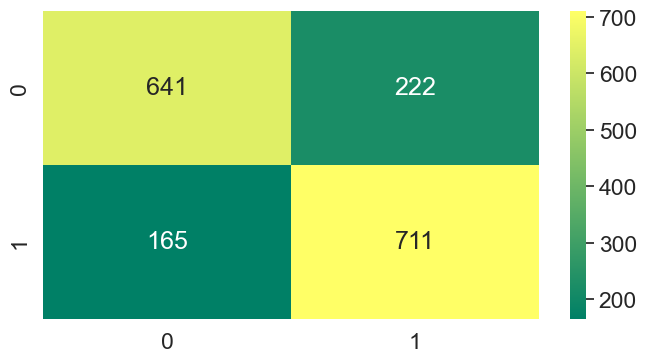

In [81]:
# Logistic Regression
model_prediction(LogisticRegression())

accuracy_score of KNeighborsClassifier() on training data is: 82.72936439459303
accuracy_score of KNeighborsClassifier() on testing dara is: 76.02070155261644

 ----------------------------------------------------------------------------------------------------
precision score of KNeighborsClassifier() is: 0.7722419928825622
recall score of KNeighborsClassifier() is: 0.7431506849315068
F1 score of KNeighborsClassifier() is: 0.7574171029668412

 ----------------------------------------------------------------------------------------------------
confusion matrix of KNeighborsClassifier() is:


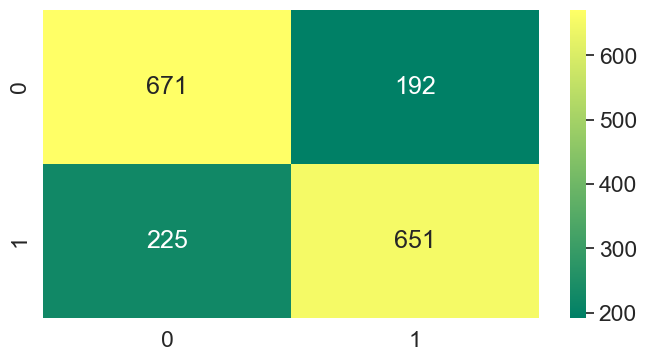

In [82]:
# KNeighbors Classifier
model_prediction(KNeighborsClassifier())

accuracy_score of SVC() on training data is: 81.17630140926086
accuracy_score of SVC() on testing dara is: 79.64347326049453

 ----------------------------------------------------------------------------------------------------
precision score of SVC() is: 0.8013856812933026
recall score of SVC() is: 0.7922374429223744
F1 score of SVC() is: 0.7967853042479909

 ----------------------------------------------------------------------------------------------------
confusion matrix of SVC() is:


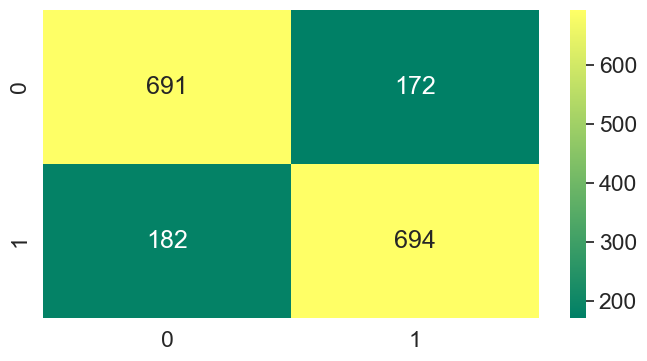

In [83]:
# Support vector classifier
model_prediction(SVC())

accuracy_score of GaussianNB() on training data is: 74.86338797814209
accuracy_score of GaussianNB() on testing dara is: 74.35307648073606

 ----------------------------------------------------------------------------------------------------
precision score of GaussianNB() is: 0.7806788511749347
recall score of GaussianNB() is: 0.682648401826484
F1 score of GaussianNB() is: 0.728380024360536

 ----------------------------------------------------------------------------------------------------
confusion matrix of GaussianNB() is:


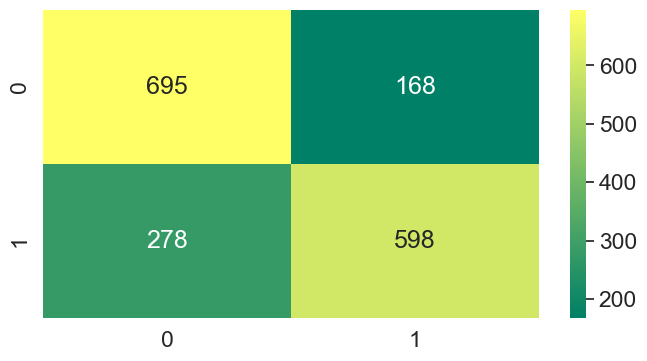

In [84]:
# Naive Bayes 
model_prediction(GaussianNB())

In [86]:
# Model building for unscaled data

def model_prediction_u(model):
    model.fit(x_train, y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = accuracy_score(y_train, x_train_pred) * 100
    b = accuracy_score(y_test, x_test_pred) * 100
    training_score.append(a)
    testing_score.append(b)

    print(f'accuracy_score of {model} on training data is:', a)
    print(f'accuracy_score of {model} on testing dara is:', b)
    print('\n','-'*100)
    print(f'precision score of {model} is:', precision_score(y_test, x_test_pred))
    print(f'recall score of {model} is:', recall_score(y_test, x_test_pred))
    print(f'F1 score of {model} is:', f1_score(y_test, x_test_pred))
    print('\n','-'*100)
    print(f'confusion matrix of {model} is:')
    cm = confusion_matrix(y_test, x_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm, annot=True, fmt='g', cmap='summer')
    plt.show()

accuracy_score of DecisionTreeClassifier() on training data is: 98.53321829163072
accuracy_score of DecisionTreeClassifier() on testing dara is: 73.72052903967797

 ----------------------------------------------------------------------------------------------------
precision score of DecisionTreeClassifier() is: 0.734602463605823
recall score of DecisionTreeClassifier() is: 0.7488584474885844
F1 score of DecisionTreeClassifier() is: 0.7416619559072922

 ----------------------------------------------------------------------------------------------------
confusion matrix of DecisionTreeClassifier() is:


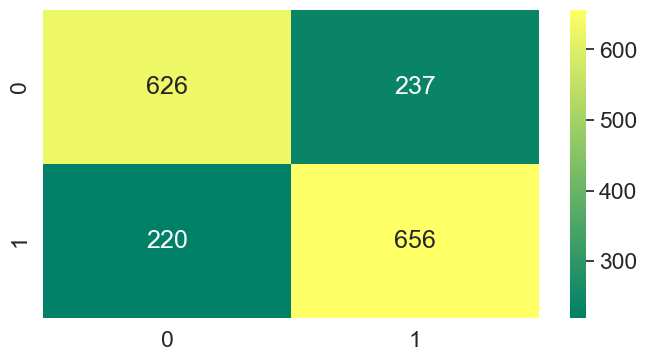

In [87]:
# Decision tree classifier
model_prediction_u(DecisionTreeClassifier())

accuracy_score of RandomForestClassifier() on training data is: 98.53321829163072
accuracy_score of RandomForestClassifier() on testing dara is: 80.50603795284647

 ----------------------------------------------------------------------------------------------------
precision score of RandomForestClassifier() is: 0.8262454434993924
recall score of RandomForestClassifier() is: 0.776255707762557
F1 score of RandomForestClassifier() is: 0.8004708652148322

 ----------------------------------------------------------------------------------------------------
confusion matrix of RandomForestClassifier() is:


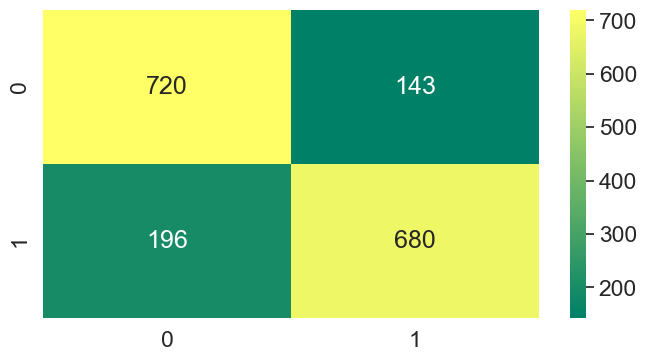

In [88]:
# Random Forest classifier
model_prediction_u(RandomForestClassifier())

accuracy_score of AdaBoostClassifier() on training data is: 79.98274374460742
accuracy_score of AdaBoostClassifier() on testing dara is: 79.24094307073031

 ----------------------------------------------------------------------------------------------------
precision score of AdaBoostClassifier() is: 0.7657378740970072
recall score of AdaBoostClassifier() is: 0.8470319634703196
F1 score of AdaBoostClassifier() is: 0.8043360433604336

 ----------------------------------------------------------------------------------------------------
confusion matrix of AdaBoostClassifier() is:


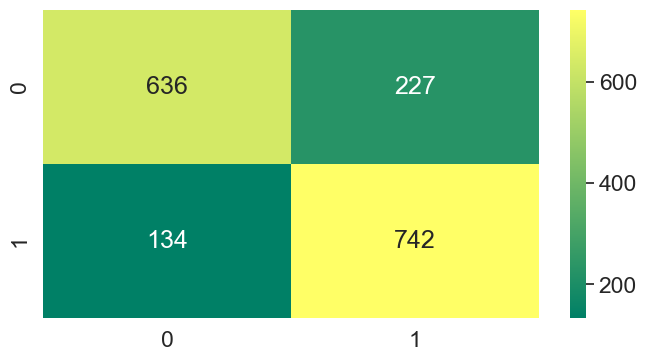

In [89]:
# Ada boost classifier
model_prediction_u(AdaBoostClassifier())

accuracy_score of GradientBoostingClassifier() on training data is: 82.053494391717
accuracy_score of GradientBoostingClassifier() on testing dara is: 79.29844738355378

 ----------------------------------------------------------------------------------------------------
precision score of GradientBoostingClassifier() is: 0.7721518987341772
recall score of GradientBoostingClassifier() is: 0.8356164383561644
F1 score of GradientBoostingClassifier() is: 0.8026315789473685

 ----------------------------------------------------------------------------------------------------
confusion matrix of GradientBoostingClassifier() is:


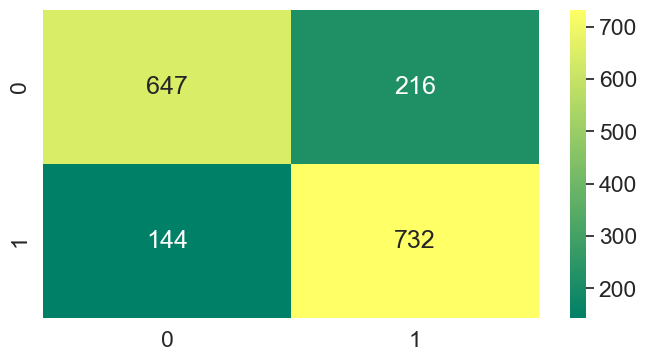

In [90]:
# Gradient Boosting classifier
model_prediction_u(GradientBoostingClassifier())

accuracy_score of LGBMClassifier() on training data is: 88.35202761000863
accuracy_score of LGBMClassifier() on testing dara is: 81.48361127084532

 ----------------------------------------------------------------------------------------------------
precision score of LGBMClassifier() is: 0.8064159292035398
recall score of LGBMClassifier() is: 0.8321917808219178
F1 score of LGBMClassifier() is: 0.8191011235955057

 ----------------------------------------------------------------------------------------------------
confusion matrix of LGBMClassifier() is:


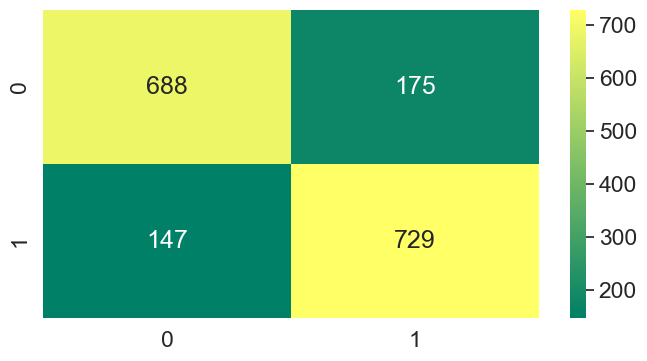

In [91]:
# LGBM classifier
model_prediction_u(LGBMClassifier())

accuracy_score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) on training data is: 92.78113316077078
accuracy_score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping

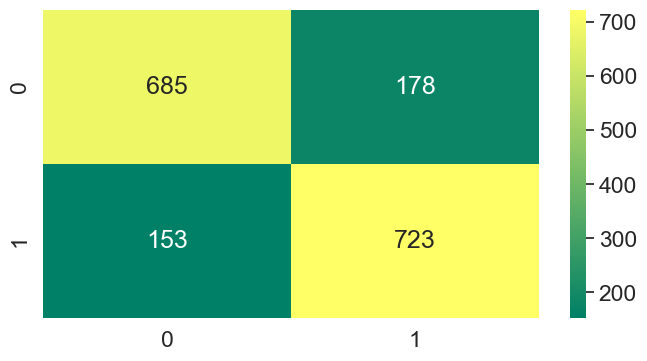

In [92]:
# XGB classifier
model_prediction_u(XGBClassifier())

In [93]:
# All model performance camparison
models = ["Logistic Regression","KNN","SVM","Naive Bayes","Decision Tree","Random Forest","Ada Boost",
          "Gradient Boost","LGBM","XGBoost"]

In [94]:
df_model = pd.DataFrame({'algorithms':models,
                         'Training Score':training_score,
                         'Testing score':testing_score})
df_model

,algorithms,Training Score,Testing score
0,Logistic Regression,77.883233,77.745831
1,KNN,82.729364,76.020702
2,SVM,81.176301,79.643473
3,Naive Bayes,74.863388,74.353076
4,Decision Tree,98.533218,73.720529
5,Random Forest,98.533218,80.506038
6,Ada Boost,79.982744,79.240943
7,Gradient Boost,82.053494,79.298447
8,LGBM,88.352028,81.483611
9,XGBoost,92.781133,80.966072


##### Observation

💡 Highest performance was give by LGBM near to 82%.

💡 But RandomForest and XgBoost's performance were also good.

💡 So we will do Hyper-Parameter Tunning on these three Models.

In [95]:
# LGBM hyper parameter tunning
model1 = LGBMClassifier()

params1 = {"n_estimators":[100,300,500,600,650],
              "learning_rate":[0.01,0.02,0.03],
              "random_state":[0,42,48,50],
               "num_leaves":[16,17,18]}

grid1 = GridSearchCV(model1, param_grid=params1, cv=5, n_jobs=-1)
grid1.fit(x_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03],
                         'n_estimators': [100, 300, 500, 600, 650],
                         'num_leaves': [16, 17, 18],
                         'random_state': [0, 42, 48, 50]})

In [96]:
grid1.best_score_

0.8094625780324698

In [100]:
best1 = grid1.best_params_
best1

{'learning_rate': 0.01,
 'n_estimators': 500,
 'num_leaves': 17,
 'random_state': 0}

In [102]:
# LGBM with best parameters
model1 = LGBMClassifier(**best1)
model1.fit(x_train, y_train)

LGBMClassifier(learning_rate=0.01, n_estimators=500, num_leaves=17,
               random_state=0)

In [103]:
x_test_pred1 = model1.predict(x_test)

In [104]:
accuracy_score(y_test, x_test_pred1)

0.8004600345025877

In [107]:
# XGB classifier hyper parameter tunning
model2 = XGBClassifier()

params2 = {"n_estimators":[50,100,150],
             "random_state":[0,42,50],
             "learning_rate":[0.1,0.3,0.5,1.0]}

grid2 = GridSearchCV(model1, param_grid=params2, cv=5, n_jobs=-1)
grid2.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=LGBMClassifier(learning_rate=0.01, n_estimators=500,
                                      num_leaves=17, random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.5, 1.0],
                         'n_estimators': [50, 100, 150],
                         'random_state': [0, 42, 50]})

In [108]:
grid2.best_score_

0.8093182793808088

In [109]:
best2 = grid2.best_params_
best2

{'learning_rate': 0.1, 'n_estimators': 100, 'random_state': 0}

In [110]:
# XGB classifier with best parameters
model2 = XGBClassifier(**best2)
model2.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [111]:
x_test_pred2 = model2.predict(x_test)

In [112]:
accuracy_score(y_test, x_test_pred2)

0.8125359401955147

In [114]:
# Random Forest classifier hyper parameter tunning
model3 = RandomForestClassifier()

params3 = {'n_estimators': [100,300,500,550],
               'min_samples_split':[7,8,9],
               'max_depth': [10,11,12], 
               'min_samples_leaf':[4,5,6]}

grid3 = GridSearchCV(model3, param_grid=params3, cv=5, n_jobs=-1)
grid3.fit(x_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12],
                         'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [7, 8, 9],
                         'n_estimators': [100, 300, 500, 550]})

In [115]:
grid3.best_score_

0.8009782310743784

In [117]:
best3 = grid3.best_params_
best3

{'max_depth': 12,
 'min_samples_leaf': 5,
 'min_samples_split': 8,
 'n_estimators': 100}

In [118]:
# Random Forest classifier with best parameters
model3 = RandomForestClassifier(**best3)
model3.fit(x_train, y_train)

RandomForestClassifier(max_depth=12, min_samples_leaf=5, min_samples_split=8)

In [119]:
x_test_pred3 = model3.predict(x_test)

In [120]:
accuracy_score(y_test, x_test_pred3)

0.8010350776308223